<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [115]</a>'.</span>

In [1]:
from yugiquery import *
header('Cards')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 19/02/2023 17:02 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  Extras](#Extras)
    *   [4.1 Multiple secondary types](#Multiple-secondary-types)
    *   [4.2 Not yet released](#Not-yet-released)
    *   [4.3 Counters and Tokens](#Counters-and-Tokens)
*   [5  Epilogue](#Epilogue)
    *   [5.1  HTML export](#HTML-export)
<!-- *   [5.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch Monster
monster_df = fetch_monster()

  0%|          | 0/8 [00:00<?, ?attribute/s]

8072 results



In [4]:
# Fetch Spell
spell_df = fetch_st(st='Spell')

# Fetch Trap
trap_df = fetch_st(st='Trap')

2404 results

1827 results



In [5]:
# Fetch Token
token_df = fetch_token()

# Fetch Counter
counter_df = fetch_counter()

# Fetch errata
errata_df = fetch_errata()

180 results

13 results



  0%|          | 0/37 [00:00<?, ?initial/s]

4976 results



## Merge data

In [6]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df, drop=True)
spell_df = merge_errata(spell_df, errata_df, drop=True)
trap_df = merge_errata(trap_df, errata_df, drop=True)
token_df = merge_errata(token_df, errata_df, drop=True)
counter_df = merge_errata(counter_df, errata_df, drop=True)

# Add counters to tokens data frame
token_df = pd.concat([token_df, counter_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined spell and trap data frame
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined monster, spell and trap data frames
cards_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined data frames with full data
full_df = pd.concat([cards_df, token_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

print('Data merged')

Data merged


# Check changes

## Load previous data

In [7]:
# Get list of files
files_list = sorted(glob.glob('../data/all_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if files_list:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[0], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Secondary type'] = previous_df['Secondary type'].dropna().apply(literal_eval)
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df[previous_df.columns].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(files_list[0]).split('_')[-1].rstrip('.csv'))
    print('File loaded')
else:
    previous_df = None
    print('No older files')

No older files


## Generate changelog

In [8]:
if previous_df is None:
    changelog = None
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/cards_changelog_{timestamp.isoformat(timespec="minutes")}_{previous_ts.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

Skipped


## Save data

In [7]:
if changelog is not None and changelog.empty:
    print('No changes. New data not saved')
else: 
    full_df.to_csv(f'../data/all_cards_{timestamp.isoformat(timespec="minutes")}.csv', index = False)
    print('Data saved')

Data saved


# Data visualization

## Full data

In [10]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4       "Infernoble Arms - Durendal"  37478723    Spell Card   
...                              ...       ...           ...   
12492                  Zubaba Knight  97896503  Monster Card   
12493        Zubababancho Gagagacoat  23720856  Monster Card   
12494      Zuijin of the Ice Barrier  43256007  Monster Card   
12495     Zure, Knight of Dark World  07459013  Monster Card   
12496      Zushin the Sleeping Giant  67547370  Monster Card   

                    Property        Archseries  \
0      Continuous Spell Card               NaN   
1      Continuous Spell Card               NaN   
2      Quick-Play Spell Card               NaN   
3      Quick-Play Spell Card               NaN   
4           Equip Spell Card     (Noble Arms,)   
...                      ...               ...   
12492                    NaN         (Zubaba,)   
12493                    NaN  (Gagaga, Zubaba)   
12494                    NaN    (Ice Barrier,)   
12495                    NaN     (Dark World,)   
12496                    NaN               NaN   

                                             Effect type TCG status  \
0                                      (Trigger Effect,)  Unlimited   
1               (Continuous-like Effect, Trigger Effect)  Unlimited   
2                         (Effect, Ignition-like Effect)  Unlimited   
3                                              (Effect,)  Unlimited   
4      (Condition, Ignition-like Effect, Trigger Effect)  Unlimited   
...                                                  ...        ...   
12492                                  (Trigger Effect,)  Unlimited   
12493                       (Condition, Ignition Effect)  Unlimited   
12494                       (Condition, Ignition Effect)  Unlimited   
12495                                                NaN  Unlimited   
12496  (Continuous Effect, Ignition Effect, Summoning...  Unlimited   

      OCG status                                           Page URL Artwork  \
0      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Breedi...     NaN   
1      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Incubator     NaN   
2      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Recomb...     NaN   
3      Unlimited  https://yugipedia.com/wiki/%22A%22_Cell_Scatte...     NaN   
4      Unlimited  https://yugipedia.com/wiki/%22Infernoble_Arms_...     NaN   
...          ...                                                ...     ...   
12492  Unlimited           https://yugipedia.com/wiki/Zubaba_Knight     NaN   
12493  Unlimited  https://yugipedia.com/wiki/Zubababancho_Gagaga...     NaN   
12494  Unlimited  https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...     NaN   
12495  Unlimited  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...     NaN   
12496  Unlimited  https://yugipedia.com/wiki/Zushin_the_Sleeping...     NaN   

        Modification date   Errata Attribute    Primary type Secondary type  \
0     2021-11-06 13:57:15  (Name,)       NaN             NaN            NaN   
1     2022-06-13 04:27:51      NaN       NaN             NaN            NaN   
2     2020-03-12 22:40:14      NaN       NaN             NaN            NaN   
3     2021-11-06 13:58:32      NaN       NaN             NaN            NaN   
4     2023-01-28 17:19:31      NaN       NaN             NaN            NaN   
...                   ...      ...       ...             ...            ...   
12492 2023-02-12 23:14:21      NaN     EARTH  Effect Monster            NaN   
12493 2023-02-19 06:12:41      NaN     EARTH  Effect Monster            NaN   
12494 2021-12-07 13:55:49      NaN     WATER  Effect Monster            NaN   
12495 2022-12-01 16:13:43  (Type,)      DARK  Normal Monster          

Full data available to download [here](../data)

## Card types

In [124]:
print('Total number of card types:', cards_df['Card type'].nunique())

Total number of card types: 3


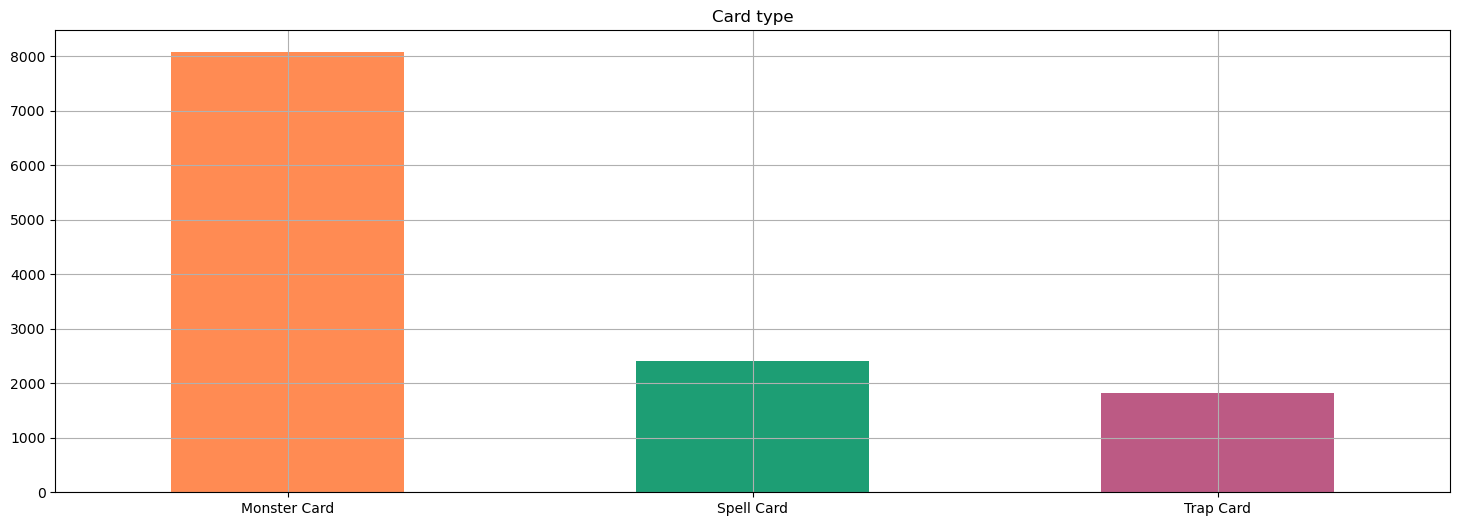

In [12]:
card_type_colors = [colors_dict[i] for i in full_df['Card type'].value_counts().index]
cards_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [13]:
print('Total number of attributes:', monster_df['Attribute'].nunique())

Total number of attributes: 8


In [14]:
monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

Name  Password  Archseries  Primary type  Secondary type  \
Attribute                                                             
?             3         0           2             1               0   
DARK       2242      2213         457             8               7   
DIVINE        6         0           3             1               0   
EARTH      1888      1873         332             8               6   
FIRE        673       668         188             8               7   
LIGHT      1645      1611         391             8               7   
WATER       841       836         208             8               6   
WIND        769       762         217             8               6   

           Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
Attribute                                                                      
?                     0            0    0               0     0            0   
DARK                 23          155   62              12     6           42   
DIVINE                2            6    1               0     0            0   
EARTH                23          127   59              12     4           29   
FIRE                 22           85   39               8     4           22   
LIGHT                23          134   49              10     5           30   
WATER                22           93   40               9     4           16   
WIND                 23          105   37              11     4           14   

           ATK  Level/Rank  TCG status  OCG status  Page URL  Artwork  \
Attribute                                                               
?            0           1           1           1         3        0   
DARK        69          14           7           7      2245        3   
DIVINE       1           2           1           1         6        1   
EARTH       70          12           6           6      1890        3   
FIRE        42          12           3           6       673        3   
LIGHT       57          14           6           6      1645        3   
WATER       56          12           5           7       841        3   
WIND        45          12           7           7       769        3   

           Modification date  Errata  
Attribute                             
?                          3       0  
DARK                    2238       3  
DIVINE                     6       2  
EARTH                   1883       3  
FIRE                     671       3  
LIGHT                   1641       3  
WATER                    840       3  
WIND                     766       3

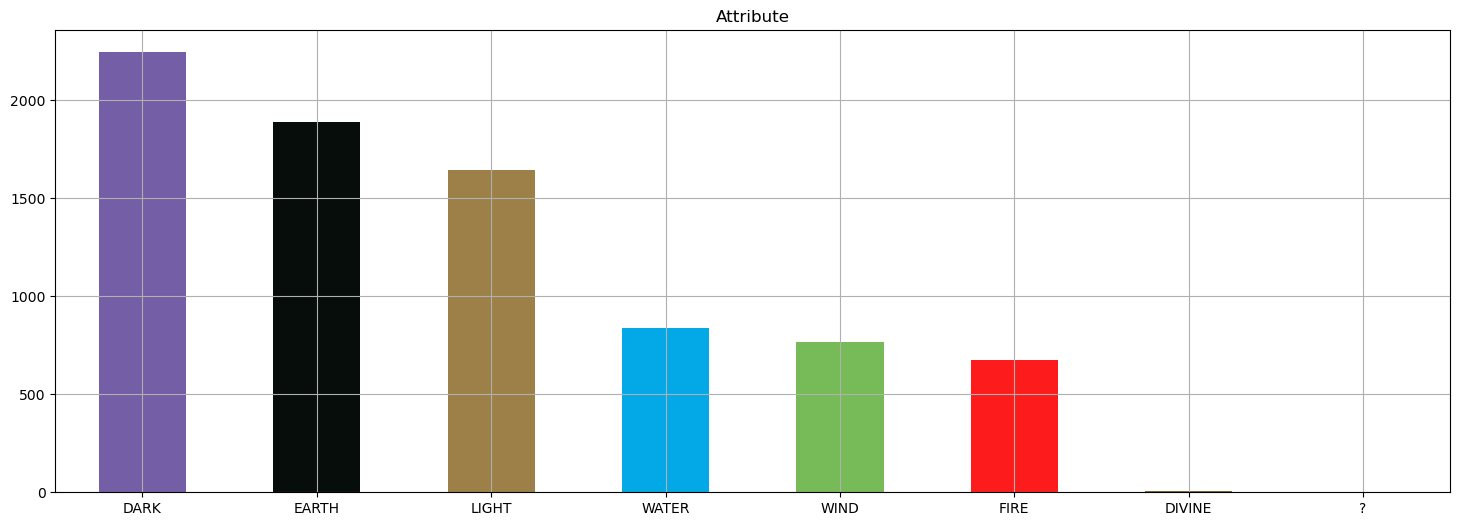

In [15]:
attribute_colors = [colors_dict[i] for i in monster_df['Attribute'].value_counts().index]
monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [16]:
print('Total number of primary types:', monster_df['Primary type'].nunique())

Total number of primary types: 8


In [17]:
monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

Name  Password  Archseries  Attribute  Secondary type  \
Primary type                                                             
Effect Monster   5467      5436         782          7               8   
Fusion Monster    436       432         142          6               1   
Link Monster      375       368         139          6               0   
Monster Token      41         0          25          7               0   
Normal Monster    708       702         110          6               1   
Ritual Monster    126       120          38          6               3   
Synchro Monster   422       417         161          6               1   
Xyz Monster       496       488         194          6               0   

                 Monster type  Effect type  DEF  Pendulum Scale  Link  \
Primary type                                                            
Effect Monster             25          205   65              13     0   
Fusion Monster             23           68   45               4     0   
Link Monster               23           52    0               0     6   
Monster Token              16            0    7               0     0   
Normal Monster             23            6   48              10     0   
Ritual Monster             15           33   26               1     0   
Synchro Monster            23           57   37               4     0   
Xyz Monster                23           70   41               5     0   

                 Link Arrows  ATK  Level/Rank  TCG status  OCG status  \
Primary type                                                            
Effect Monster             0   72          12           6           6   
Fusion Monster             0   47          12           4           5   
Link Monster              62   38           0           5           6   
Monster Token              0    7           7           1           1   
Normal Monster             0   58           8           3           4   
Ritual Monster             0   35          12           2           2   
Synchro Monster            0   40          13           5           5   
Xyz Monster                0   50          14           6           5   

                 Page URL  Artwork  Modification date  Errata  
Primary type                                                   
Effect Monster       5467        3               5437       3  
Fusion Monster        436        3                432       3  
Link Monster          375        3                374       2  
Monster Token          41        1                 41       1  
Normal Monster        709        3                709       3  
Ritual Monster        126        1                126       3  
Synchro Monster       422        2                422       3  
Xyz Monster           496        2                494       3

#### Has effect discrimination

In [18]:
has_effect = monster_df['Primary type'].where(monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = monster_df['Primary type'].where(monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

Effect  No Effect
Effect Monster     5467          0
Xyz Monster         494          2
Synchro Monster     419          3
Fusion Monster      375         61
Link Monster        370          5
Ritual Monster      111         15
Normal Monster       34        676
Monster Token         0         41

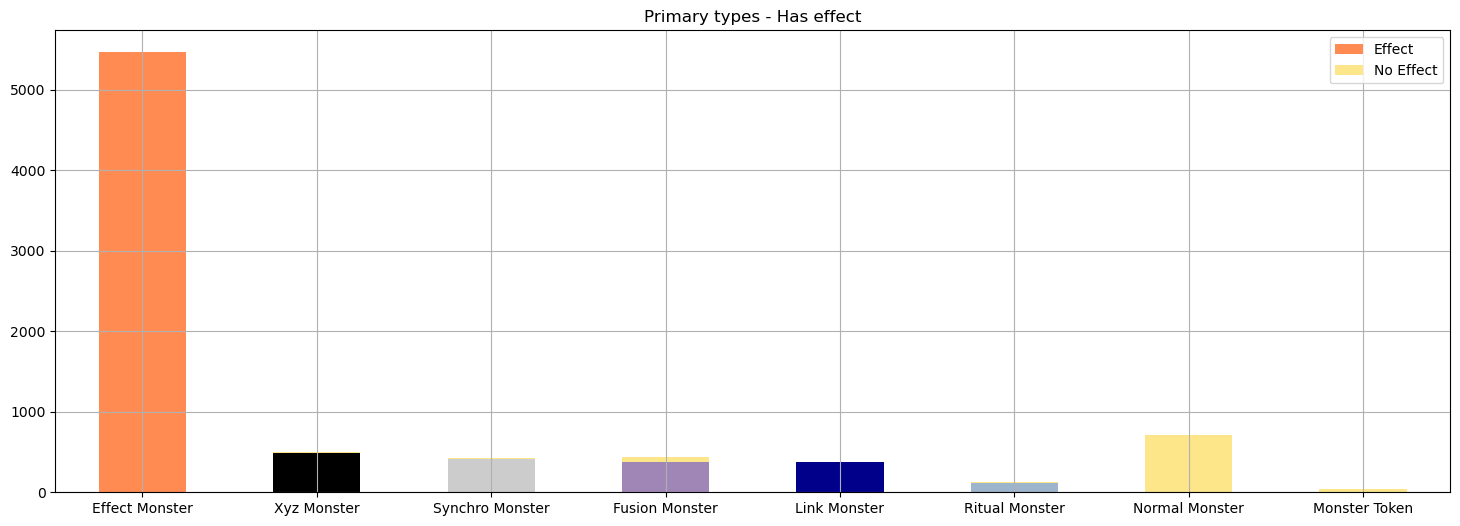

In [19]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [9]:
not_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

Not Pendulum  Pendulum
Effect Monster           5200       268
Normal Monster            672        38
Xyz Monster               487         9
Fusion Monster            428        10
Synchro Monster           415         7
Link Monster              375         0
Ritual Monster            125         1
Monster Token              41         0

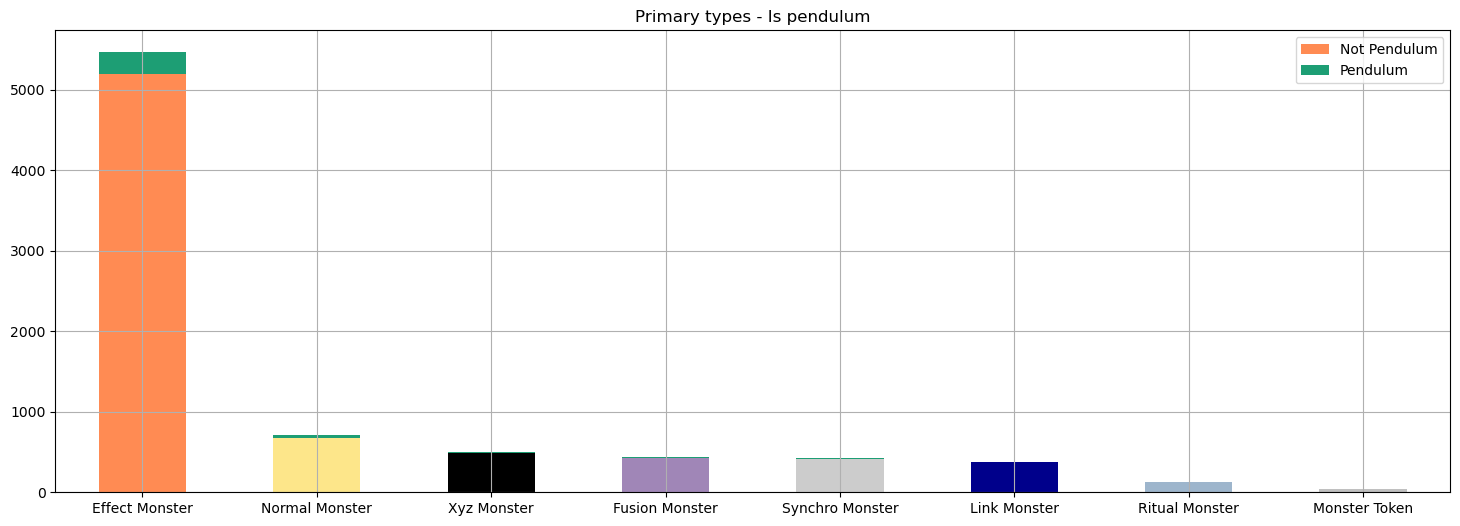

In [11]:
monster_type_colors_b = {'Pendulum': colors_dict['Pendulum Monster'], 'Not Pendulum': [colors_dict[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(cards_df['Primary type'],cards_df['Attribute'])
primmary_crosstab

Attribute        ?  DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                     
Effect Monster   0  1496       6   1311   459   1108    555   532
Fusion Monster   0   150       0     83    34     99     35    35
Link Monster     0   125       0     76    33     87     29    25
Monster Token    3    13       0      8     1     10      3     3
Normal Monster   0   174       0    242    51     73    106    64
Ritual Monster   0    42       0     17     7     34     20     6
Synchro Monster  0   111       0     70    50     80     37    74
Xyz Monster      0   135       0     83    38    154     56    30

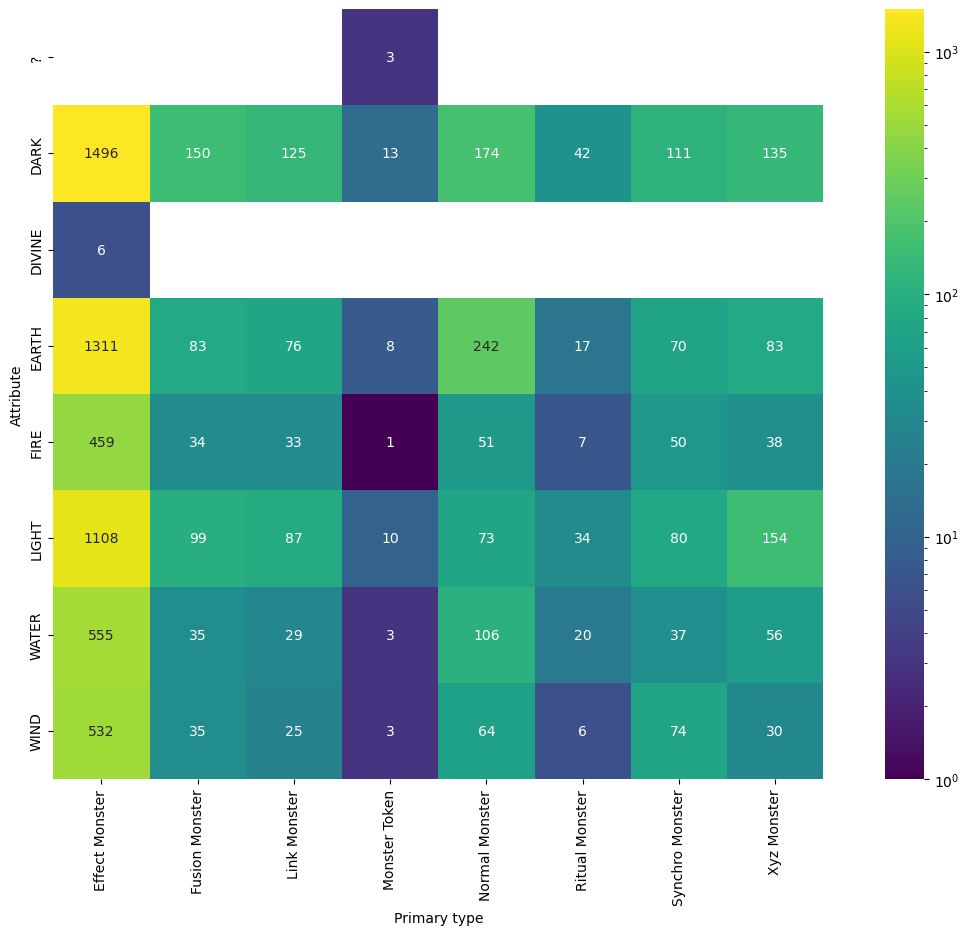

In [23]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Secondary types

In [24]:
exploded_secondary_type = monster_df.explode('Secondary type')
print('Total number of secondary types:', exploded_secondary_type['Secondary type'].nunique())

Total number of secondary types: 6


In [25]:
exploded_secondary_type.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Secondary type                                                        
Flip monster     186       184          46          6             2   
Gemini monster    45        45          13          6             1   
Spirit monster    39        39           4          6             2   
Toon monster      17        17          13          6             1   
Tuner monster    487       484         138          6             5   
Union monster     37        37           9          6             1   

                Monster type  Effect type  DEF  Pendulum Scale  ATK  \
Secondary type                                                        
Flip monster              19           20   33               1   38   
Gemini monster            18            6   19               0   17   
Spirit monster            13            8   20               2   22   
Toon monster               7            8   15               0   12   
Tuner monster             23           62   31               7   31   
Union monster              9            6   14               0   17   

                Level/Rank  TCG status  OCG status  Page URL  Artwork  \
Secondary type                                                          
Flip monster            12           3           5       186        1   
Gemini monster           8           1           1        45        0   
Spirit monster          10           1           2        39        1   
Toon monster             5           1           2        17        1   
Tuner monster            9           3           4       487        3   
Union monster            8           1           1        37        1   

                Modification date  Errata  
Secondary type                             
Flip monster                  186       3  
Gemini monster                 45       3  
Spirit monster                 39       1  
Toon monster                   17       2  
Tuner monster                 487       3  
Union monster                  37       2

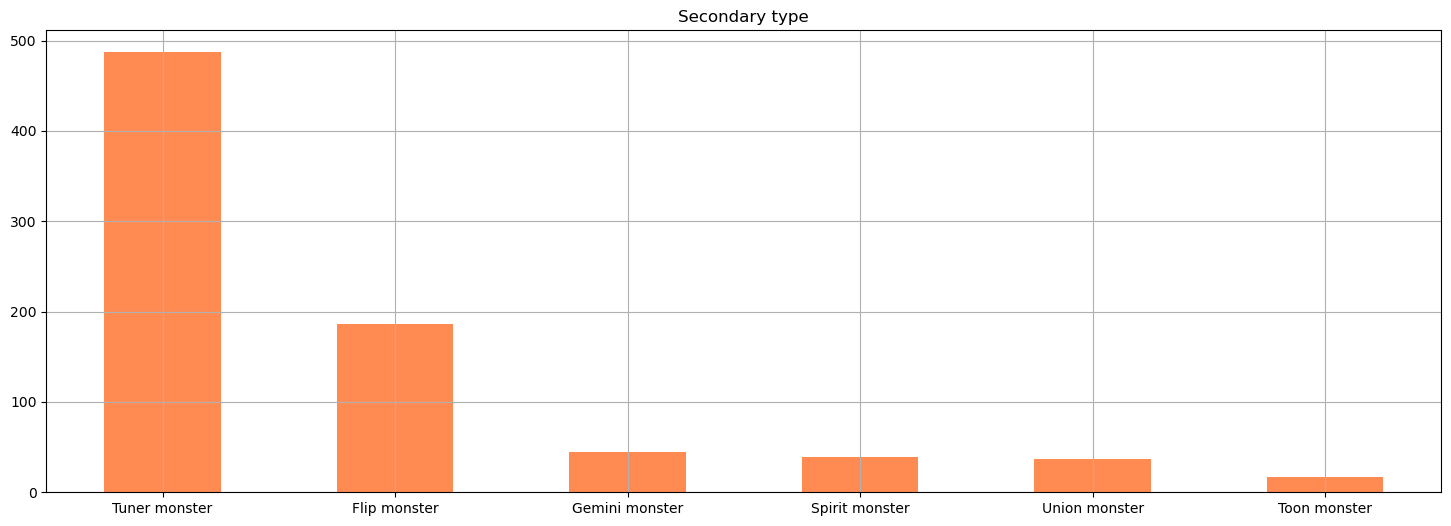

In [26]:
secondary_type_colors = colors_dict['Effect Monster']
exploded_secondary_type['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(exploded_secondary_type['Secondary type'],exploded_secondary_type['Attribute'])
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     62    10     33     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      5      6    11
Toon monster       7      5     1      2      1     1
Tuner monster    126     94    45     99     53    70
Union monster      6      9     3     12      4     3

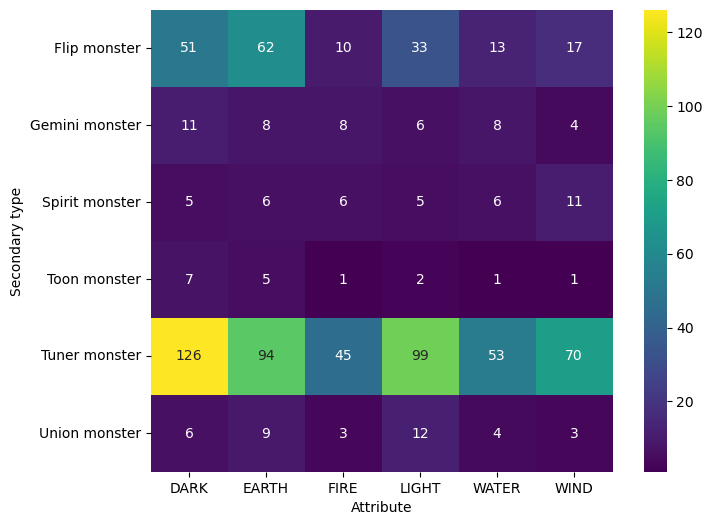

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(exploded_secondary_type['Primary type'],exploded_secondary_type['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            185              45              37            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               2             0   
Synchro Monster             0               0               0             0   
All                       186              45              39            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             440             37  761  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    5  
Synchro Monster             30              0   30  
All                        487             37  811

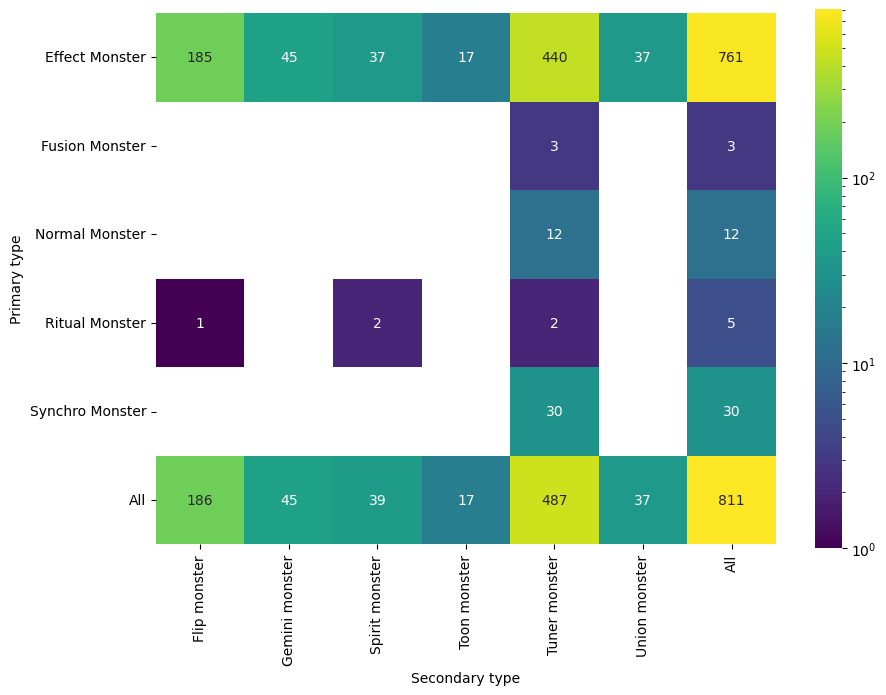

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster types

In [31]:
print('Total number of monster types:', monster_df['Monster type'].nunique())

Total number of monster types: 25


In [32]:
monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Monster type                                                         
Aqua            256       254          65          6             8   
Beast           378       371          85          6             8   
Beast-Warrior   242       235          48          6             7   
Creator God       1         0           1          1             1   
Cyberse         257       254          36          6             8   
Dinosaur        127       121          26          6             7   
Divine-Beast      5         0           2          1             1   
Dragon          663       657         186          6             8   
Fairy           520       511         115          6             8   
Fiend           766       757         148          6             8   
Fish            128       128          21          5             7   
Insect          253       252          39          6             7   
Machine         933       921         167          6             8   
Plant           235       233          39          6             7   
Psychic         180       179          43          6             6   
Pyro            122       122          35          5             6   
Reptile         172       171          35          6             7   
Rock            247       245          73          6             8   
Sea Serpent      82        82          28          6             6   
Spellcaster     680       671         150          6             8   
Thunder         130       128          35          6             7   
Warrior        1040      1030         220          6             8   
Winged Beast    315       312          66          6             8   
Wyrm             89        88          20          6             6   
Zombie          243       241          35          6             8   

               Secondary type  Effect type  DEF  Pendulum Scale  Link  \
Monster type                                                            
Aqua                        6           51   33               3     2   
Beast                       4           60   37               7     2   
Beast-Warrior               3           57   30               6     3   
Creator God                 0            1    0               0     0   
Cyberse                     1           45   29               1     6   
Dinosaur                    1           36   31               4     2   
Divine-Beast                0            5    1               0     0   
Dragon                      6          108   47               9     5   
Fairy                       5           83   37               9     4   
Fiend                       6          107   44              12     5   
Fish                        2           31   28               1     1   
Insect                      3           59   32               2     3   
Machine                     7          113   54               9     4   
Plant                       4           38   30               5     4   
Psychic                     2           43   30               5     2   
Pyro                        5           37   29               0     1   
Reptile                     3           46   29               3     2   
Rock                        4           59   39               4     3   
Sea Serpent                 3           32   26               1     2   
Spellcaster                 6          100   41              11     5   
Thunder                     4           38   29               1     2   
Warrior                     6           92   40               6     3   
Winged Beast                5           61   29               4     4   
Wyrm                        1           33   24               3     4   
Zombie                      6           52   36               2     3   

               Link Arrows  ATK  Level/Rank  TCG status  OCG status  Page URL  \
Monster type                                                           

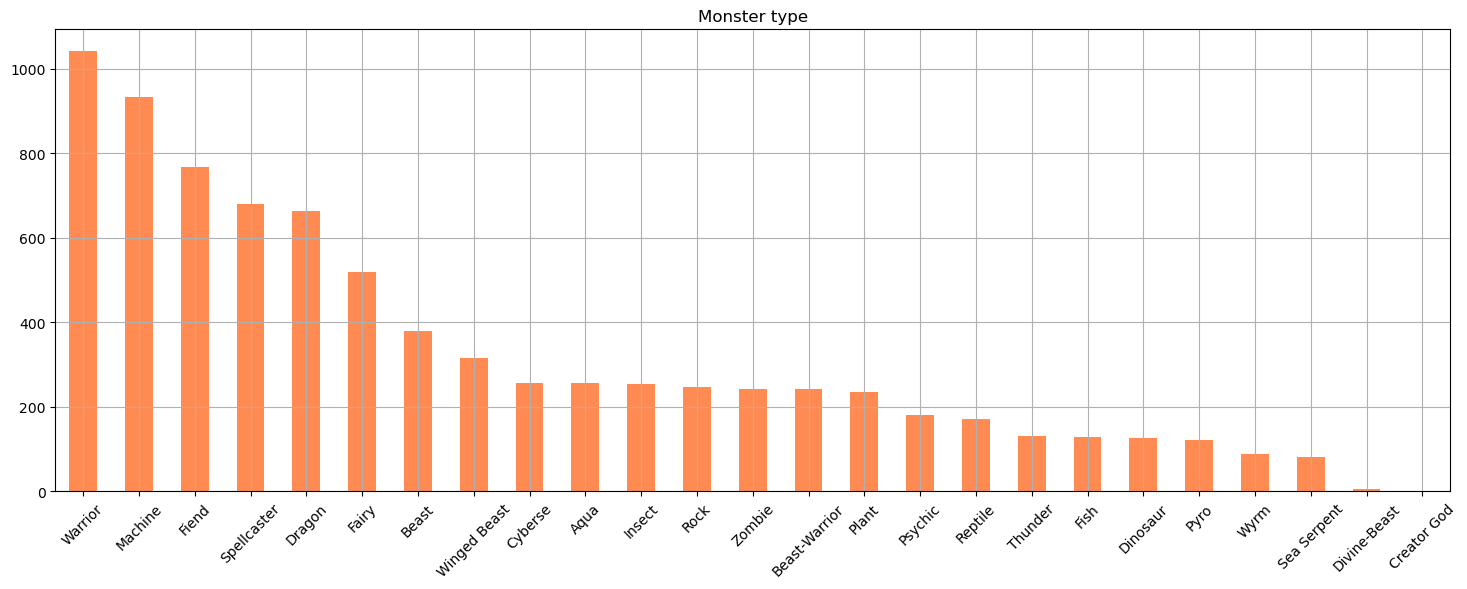

In [33]:
monster_type_colors = colors_dict['Monster Card']
monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(cards_df['Monster type'],cards_df['Attribute'], dropna=False)
monster_crosstab

Attribute      ?  DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                   
Aqua           0     9       0      6    10      4    221     6
Beast          0    37       0    213    16     74     14    25
Beast-Warrior  0    40       0     83    54     34     16    15
Creator God    0     0       1      0     0      0      0     0
Cyberse        0    72       0     37    44     63     28    13
Dinosaur       0    11       0     61    34      5      9     7
Divine-Beast   0     0       5      0     0      0      0     0
Dragon         0   257       0     47    48    171     28   113
Fairy          0    58       0     63    18    329     27    25
Fiend          0   577       0     34    47     70     24    16
Fish           0     2       0      2     0      1    121     2
Insect         0    41       0    135     6     21      4    46
Machine        0   228       0    319    52    169     49   116
Plant          0    42       0    122    11     22     24    14
Psychic        0    23       0     37    17     47     13    43
Pyro           0     3       0      6   106      4      0     3
Reptile        0    39       0     34    15     45     35     4
Rock           0    16       0    199     5     15      5     7
Sea Serpent    0     3       0      1     1      2     71     4
Spellcaster    0   281       0     53    28    194     63    62
Thunder        0    14       0     10     5     78      4    19
Warrior        0   205       0    364   103    252     53    64
Winged Beast   0   112       0      7    16     15     12   153
Wyrm           0    15       0     19    12     23     12     8
Zombie         0   161       0     38    25      7      8     4

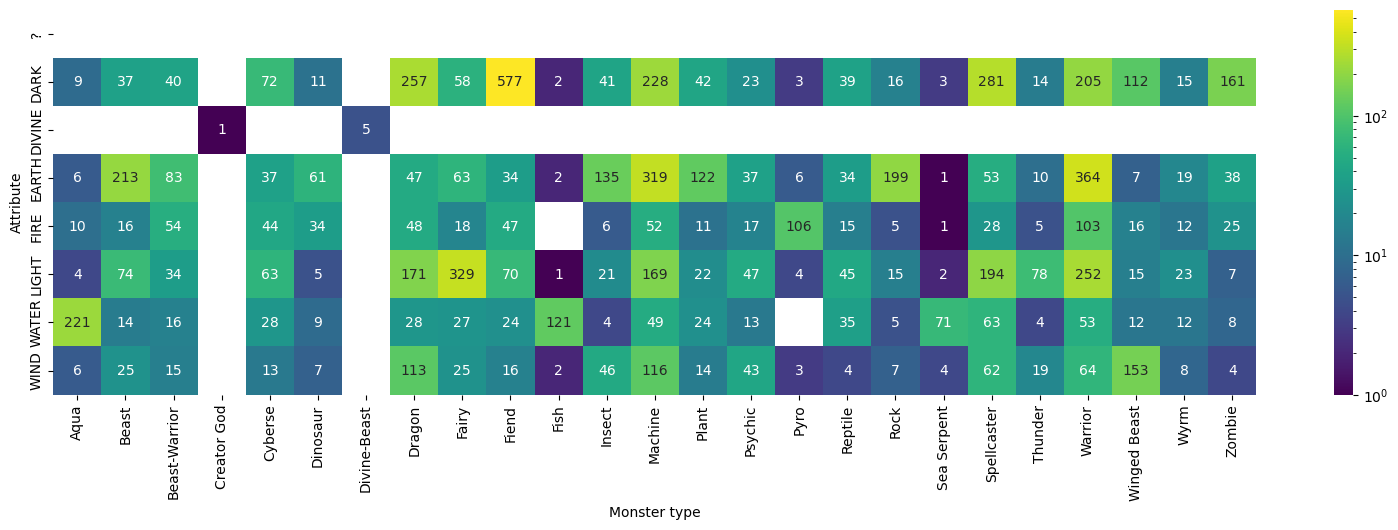

In [35]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(cards_df['Monster type'],cards_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Monster Token  \
Monster type                                                                 
Aqua                      154              11             3              2   
Beast                     273              17             9              4   
Beast-Warrior             165              11             9              0   
Creator God                 1               0             0              0   
Cyberse                   126               5            98              2   
Dinosaur                   89               8             3              1   
Divine-Beast                5               0             0              0   
Dragon                    348              64            33              1   
Fairy                     370              22            25              4   
Fiend                     536              46            28              7   
Fish                       92               5             1              0   
Insect                    186               5            10              0   
Machine                   648              47            39              6   
Plant                     163               6            15              1   
Psychic                   123              11             5              0   
Pyro                       85               8             2              0   
Reptile                   140               2             3              1   
Rock                      169              18             4              1   
Sea Serpent                55               2             2              0   
Spellcaster               513              26            26              1   
Thunder                    98               8             5              1   
Warrior                   681              96            29              3   
Winged Beast              228               9            10              1   
Wyrm                       56               2             9              0   
Zombie                    163               7             7              2   

Primary type   Normal Monster  Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                                 
Aqua                       57               8                4           17  
Beast                      50               1               14           11  
Beast-Warrior              21               5                8           23  
Creator God                 0               0                0            0  
Cyberse                     5               7                5            9  
Dinosaur                   17               0                5            4  
Divine-Beast                0               0                0            0  
Dragon                     46              15               96           61  
Fairy                      32              17               18           32  
Fiend                      72              15               24           40  
Fish                       17               1                9            3  
Insect                     29               1                8           14  
Machine                    61               4               63           65  
Plant                      24               0                8           18  
Psychic                     9               0               19           13  
Pyro                       18               0                5            4  
Reptile                    18               0                5            3  
Rock                       27               7                5           16  
Sea Serpent                 8               0                5           10  
Spellcaster                54              18               17           26  
Thunder                    10               0                6            2  
Warrior                    78              17               55           82  
Winged Beast         

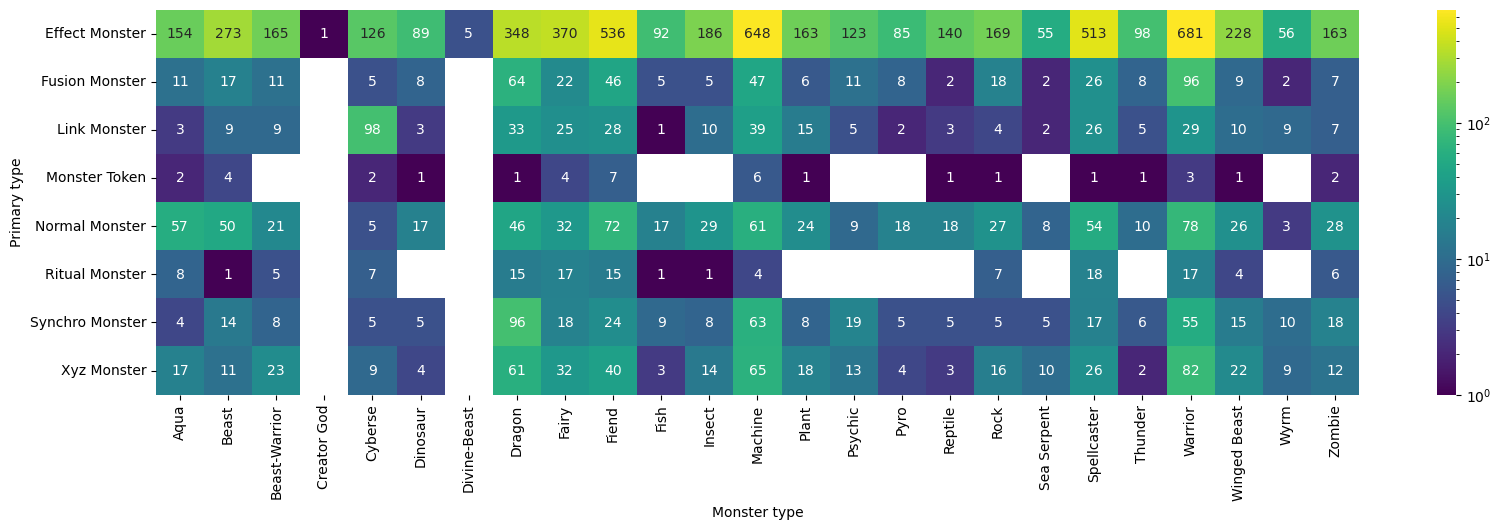

In [37]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(exploded_secondary_type['Monster type'],exploded_secondary_type['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               8             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      11               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               35               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               7             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     7              0  
Dinosaur                    8              0  
Dragon                     44              4  
Fairy                      22              5  
Fiend                      41              1  
Fish                        8              0  
Insect                     12              0  
Machine                    87             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        8              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                41              0  
Thunder                     8              0  
Warrior                    32              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     23              1

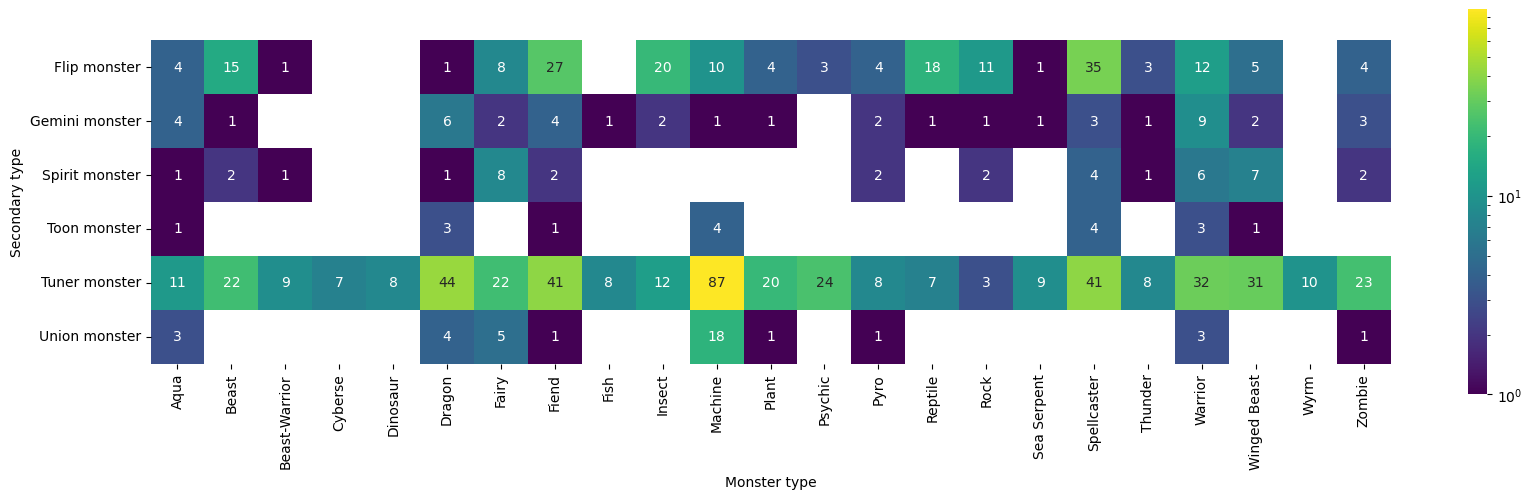

In [39]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [40]:
print('Total number of effect types:', monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [41]:
monster_df[monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Effect type                                                                   
Activation condition       1         1           1          1             1   
Condition               3136      3084         651          7             7   
Continuous Effect       2169      2161         560          7             6   
Continuous-like Effect   236       236          72          6             6   
Flip effect              171       170          44          6             1   
Ignition Effect         2631      2617         644          7             6   
Ignition-like Effect     226       220          77          6             6   
Lingering effect          19        19          12          6             3   
Maintenance cost          44        44           8          6             3   
Quick Effect            1042      1033         398          6             6   
Quick-like Effect          4         4           1          1             1   
Summoning condition      933       887         319          7             6   
Trigger Effect          4361      4339         775          7             7   
Unclassified effect      822       815         277          7             6   

                        Secondary type  Monster type  DEF  Pendulum Scale  \
Effect type                                                                 
Activation condition                 0             1    1               1   
Condition                            7            25   63              13   
Continuous Effect                    5            24   51              12   
Continuous-like Effect               4            21   35              13   
Flip effect                          2            19   33               1   
Ignition Effect                      7            24   60              12   
Ignition-like Effect                 3            20   32              13   
Lingering effect                     2            14   13               0   
Maintenance cost                     0            12   18               2   
Quick Effect                         5            23   48               9   
Quick-like Effect                    0             1    2               0   
Summoning condition                  4            25   51               9   
Trigger Effect                       7            24   62              13   
Unclassified effect                  5            25   44               9   

                        Link  Link Arrows  ATK  Level/Rank  TCG status  \
Effect type                                                              
Activation condition       0            0    1           1           1   
Condition                  6           54   62          14           5   
Continuous Effect          6           48   58          14           5   
Continuous-like Effect     1            2   41          11           3   
Flip effect                0            0   38          12           3   
Ignition Effect            5           42   65          13           5   
Ignition-like Effect       1            1   34          12           3   
Lingering effect           2            2   13           8           2   
Maintenance cost           1            1   21           8           1   
Quick Effect               6           29   49          13           4   
Quick-like Effect          0            0    3           1           1   
Summoning condition        5            7   51          13           5   
Trigger Effect             6           51   65          14           5   
Unclassified effect        5           12   48          13           4   

                        OCG status  Page URL  Artwork  Modification date  \
Effect type                                                                
Activation condition             1         1        0                  1   
Condition                        6      3136        3               3115   
Continuous Effect                5   

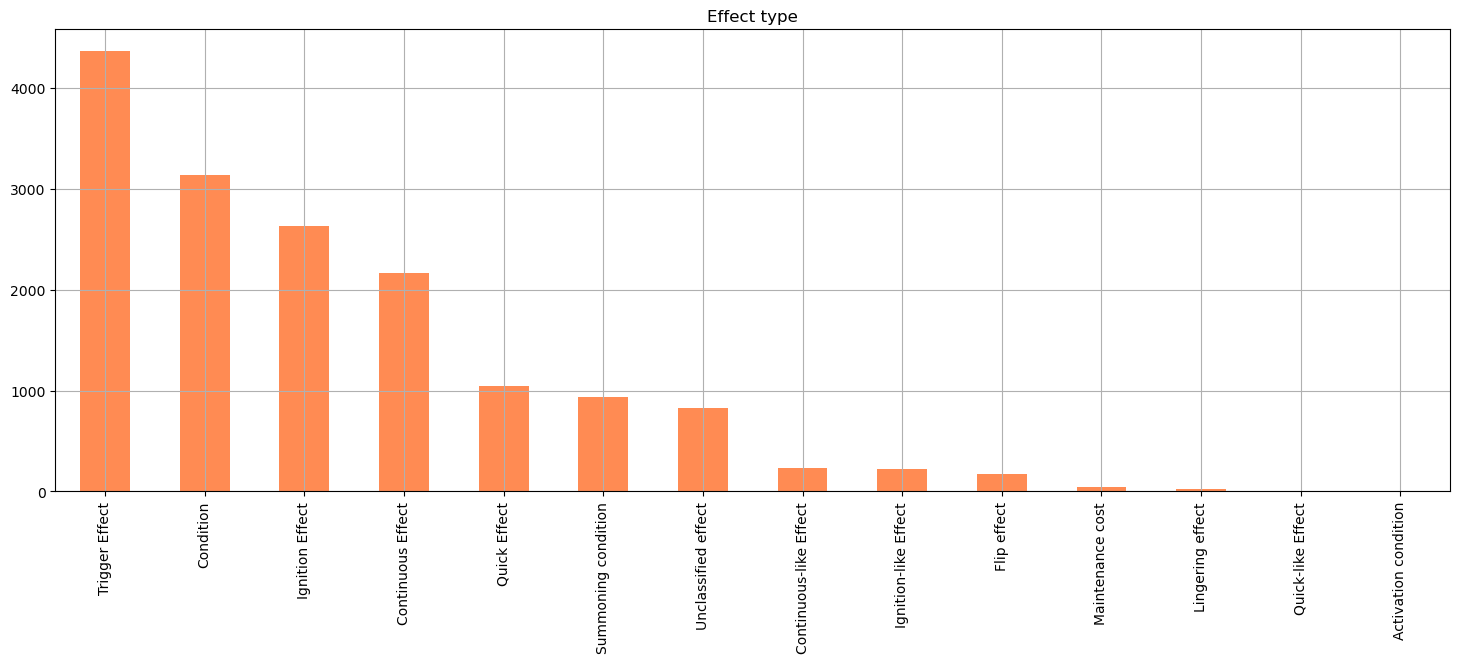

In [42]:
monster_effect_colors = colors_dict['Effect Monster']
monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [43]:
print('Total number of ATK values:', monster_df['ATK'].nunique())

Total number of ATK values: 80


In [44]:
monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
ATK                                                                         
0      624       600         235          6             8               7   
50       2         2           2          2             1               0   
100    219       219         107          6             5               3   
150      1         1           0          1             1               0   
200    122       122          69          6             6               5   
...    ...       ...         ...        ...           ...             ...   
4200     1         1           0          1             1               0   
4400     1         1           1          1             1               0   
4500    12        12           9          3             3               0   
4600     2         2           1          2             1               0   
5000     9         9           6          3             5               0   

      Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
ATK                                                                       
0               23           94   35               9     5           15   
50               2            2    2               0     0            0   
100             20           48   26               8     2            2   
150              1            0    1               0     0            0   
200             20           36   22               5     1            2   
...            ...          ...  ...             ...   ...          ...   
4200             1            0    1               0     0            0   
4400             1            1    1               0     0            0   
4500             6           10    4               0     0            0   
4600             1            2    1               0     0            0   
5000             4            8    4               0     1            1   

      Level/Rank  TCG status  OCG status  Page URL  Artwork  \
ATK                                                           
0             13           7           6       624        3   
50             1           1           1         2        0   
100           11           3           2       219        2   
150            1           1           1         1        0   
200            7           2           3       122        1   
...          ...         ...         ...       ...      ...   
4200           1           1           1         1        0   
4400           1           1           1         1        0   
4500           4           1           1        12        1   
4600           1           1           1         2        1   
5000           2           1           1         9        1   

      Modification date  Errata  
ATK                              
0                   623       3  
50                    2       0  
100                 219       3  
150                   1       0  
200                 122       3  
...                 ...     ...  
4200                  1       0  
4400                  1       1  
4500                 12       2  
4600                  2       0  
5000                  9       1  

[80 rows x 19 columns]

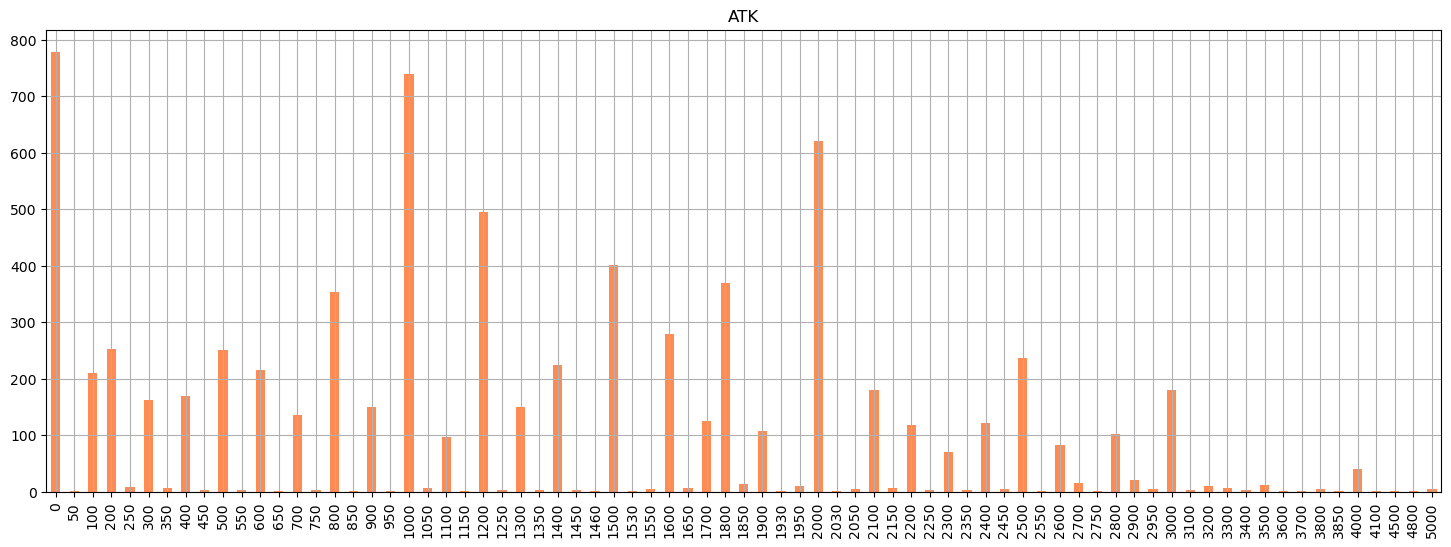

In [45]:
atk_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [46]:
print('Total number of DEF values:', monster_df['DEF'].nunique())

Total number of DEF values: 75


In [47]:
monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
DEF                                                                         
0      779       754         259          6             7               8   
50       1         1           1          1             1               0   
100    211       211          95          6             5               4   
200    253       251         109          6             6               5   
250      8         8           3          4             2               1   
...    ...       ...         ...        ...           ...             ...   
4000    40        37          32          5             5               0   
4100     2         2           1          2             1               0   
4500     2         2           1          2             2               0   
4800     1         1           1          1             1               0   
5000     5         5           3          3             2               0   

      Monster type  Effect type  Pendulum Scale  Link  Link Arrows  ATK  \
DEF                                                                       
0               23          104              10     0            0   44   
50               1            1               0     0            0    1   
100             19           47               8     0            0   24   
200             23           48               5     0            0   31   
250              5            5               0     0            0    4   
...            ...          ...             ...   ...          ...  ...   
4000            11           29               1     0            0    6   
4100             1            2               0     0            0    1   
4500             2            2               0     0            0    1   
4800             1            1               0     0            0    1   
5000             3            4               0     0            0    2   

      Level/Rank  TCG status  OCG status  Page URL  Artwork  \
DEF                                                           
0             14           5           5       779        2   
50             1           1           1         1        0   
100           10           2           3       211        2   
200           10           3           5       253        2   
250            2           1           1         8        0   
...          ...         ...         ...       ...      ...   
4000           4           1           2        40        2   
4100           1           1           1         2        1   
4500           1           1           1         2        0   
4800           1           1           1         1        0   
5000           2           1           1         5        1   

      Modification date  Errata  
DEF                              
0                   775       3  
50                    1       0  
100                 210       3  
200                 253       3  
250                   8       1  
...                 ...     ...  
4000                 40       3  
4100                  2       0  
4500                  2       0  
4800                  1       0  
5000                  5       1  

[75 rows x 19 columns]

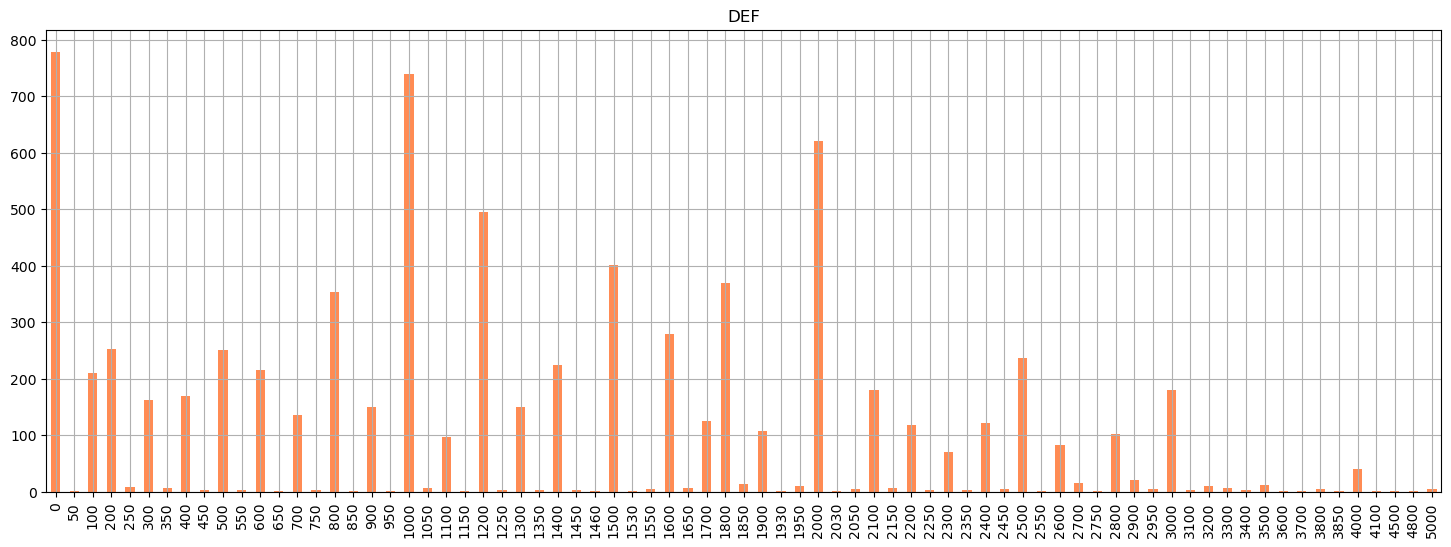

In [48]:
def_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [49]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  \
Level/Rank                                                        
0              6         6           3          2             2   
1            635       610         229          6             7   
2            681       674         215          6             7   
3           1152      1146         294          6             7   
4           2354      2349         514          6             7   
5            602       599         242          6             6   
6            614       608         237          6             6   
7            470       465         226          6             7   
8            683       668         301          6             6   
9            147       144          85          6             5   
10           252       241         150          7             5   
11            32        31          23          6             6   
12            59        53          41          7             5   
13             1         1           1          1             1   
?              4         0           2          2             1   

            Secondary type  Monster type  Effect type  DEF  Pendulum Scale  \
Level/Rank                                                                   
0                        0             2            5    2               0   
1                        7            23           81   29              10   
2                        6            23           76   29               7   
3                        6            23           96   35               9   
4                        6            23          135   46               9   
5                        6            23           84   38               8   
6                        6            23           92   37               9   
7                        6            23          101   34               9   
8                        5            23          110   40               8   
9                        2            21           56   26               1   
10                       2            22           77   31               6   
11                       3            13           22   16               1   
12                       1            13           33   17               3   
13                       0             1            1    0               0   
?                        0             1            0    1               0   

            ATK  TCG status  OCG status  Page URL  Artwork  Modification date  \
Level/Rank                                                                      
0             2           2           2         6        0                  6   
1            21           5           5       635        2                633   
2            28           4           7       681        2                678   
3            40           4           7      1152        3               1152   
4            53           5           7      2354        3               2347   
5            45           3           4       602        2                602   
6            37           5           6       615        3                615   
7            37           5           5       472        2                472   
8            41           5           5       685        3                684   
9            30           4           3       147        1                147   
10           30           4           3       252        3                252   
11           15           3           2        32        1                 32   
12           12           1           3        59        1                 59   
13            0           1           1         1        0                  1   
?             0           1           1         4        0                  4   

            Errata  
Level/Rank          
0                0  
1                3  
2                3  
3                3  
4                3  
5                3  

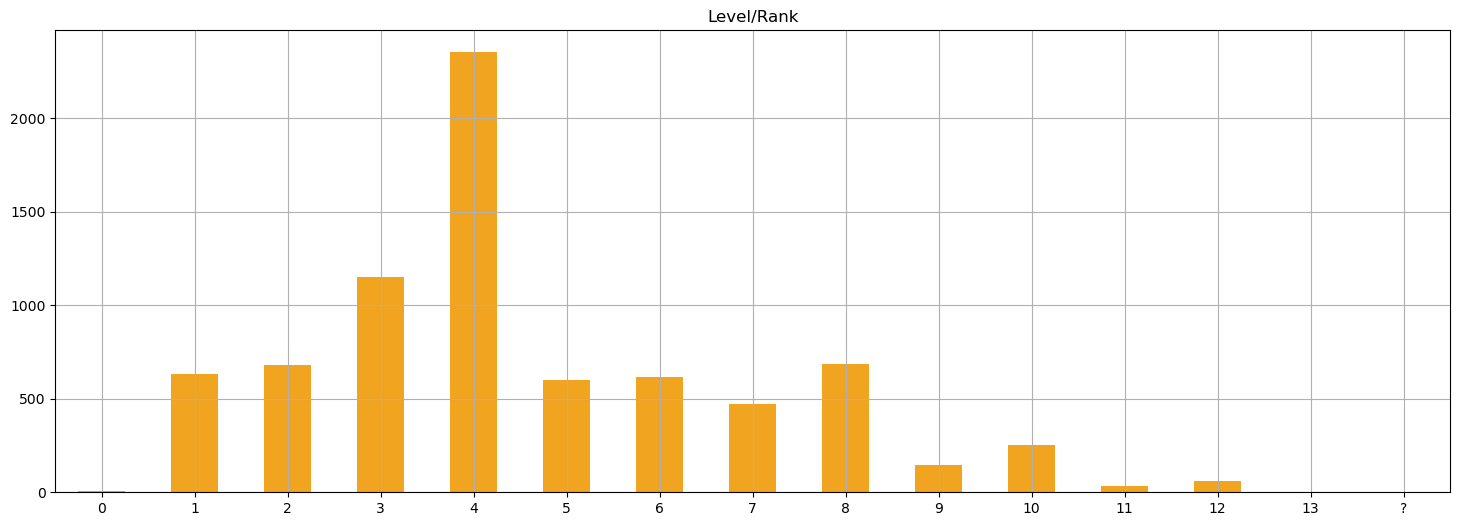

In [50]:
stars_colors = colors_dict['Level']
monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [51]:
monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            625.0   239.280000   350.419108  0.0     0.0   100.0   300.0   
2            679.0   579.307806   409.126659  0.0   300.0   500.0   800.0   
3           1149.0   956.875544   486.024801  0.0   600.0  1000.0  1300.0   
4           2342.0  1417.903501   541.696595  0.0  1200.0  1500.0  1800.0   
5            599.0  1760.550918   643.239500  0.0  1500.0  1900.0  2200.0   
6            611.0  2016.939444   611.451078  0.0  1900.0  2200.0  2400.0   
7            467.0  2285.546039   618.977309  0.0  2200.0  2500.0  2600.0   
8            675.0  2547.185185   704.489263  0.0  2500.0  2800.0  3000.0   
9            144.0  2605.208333   831.203499  0.0  2500.0  2800.0  3000.0   
10           231.0  2812.337662  1216.690696  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            55.0  3281.818182  1391.786876  0.0  3000.0  3800.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [52]:
monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            627.0   341.786284   522.466807  0.0     0.0   100.0   400.0   
2            680.0   665.220588   559.165124  0.0   200.0   500.0   900.0   
3           1149.0   956.179286   573.440262  0.0   600.0   900.0  1300.0   
4           2344.0  1168.741468   609.052001  0.0   800.0  1200.0  1600.0   
5            600.0  1425.750000   674.116577  0.0  1000.0  1500.0  1900.0   
6            611.0  1553.486088   711.561979  0.0  1200.0  1700.0  2000.0   
7            469.0  1890.191898   652.378755  0.0  1600.0  2000.0  2300.0   
8            682.0  1985.043988   846.151735  0.0  1600.0  2100.0  2500.0   
9            144.0  2312.152778   787.805808  0.0  2000.0  2500.0  2900.0   
10           240.0  2225.208333  1272.134551  0.0  1875.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            56.0  2805.357143  1614.301948  0.0  2000.0  3000.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [53]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  \
Pendulum Scale                                                        
0                 11        11           8          5             2   
1                 70        67          39          6             5   
2                 36        36          15          6             2   
3                 37        37          17          6             3   
4                 33        33          17          5             5   
5                 34        34          16          6             2   
6                 15        15           9          4             1   
7                 27        27          16          6             2   
8                 43        43          23          6             5   
9                  8         8           3          3             2   
10                15        12           8          6             5   
12                 3         3           3          2             2   
13                 1         1           1          1             1   

                Secondary type  Monster type  Effect type  DEF  ATK  \
Pendulum Scale                                                        
0                            1             8            9    6    6   
1                            2            10           38   27   27   
2                            1            11           21   22   17   
3                            1            16           24   15   23   
4                            0             8           25   16   18   
5                            1            12           20   21   23   
6                            1             7           11   11   11   
7                            1            14           14   17   19   
8                            1             9           24   18   19   
9                            1             3            5    2    3   
10                           0             6           11    8    6   
12                           0             3            3    2    2   
13                           0             1            1    1    1   

                Level/Rank  TCG status  OCG status  Page URL  Artwork  \
Pendulum Scale                                                          
0                        6           1           1        11        1   
1                       11           3           4        70        1   
2                        6           2           2        36        1   
3                        8           1           1        37        0   
4                        8           1           1        33        2   
5                        7           3           3        34        0   
6                        6           1           1        15        0   
7                        6           1           1        27        1   
8                        8           2           2        43        0   
9                        5           1           1         8        0   
10                       6           2           2        15        0   
12                       2           1           1         3        0   
13                       1           1           1         1        0   

                Modification date  Errata  
Pendulum Scale                             
0                              11       0  
1                              70       2  
2                              36       2  
3                              37       0  
4                              33       1  
5                              34       1  
6                              15       0  
7                              27       2  
8                              43       1  
9                               8       0  
10                             15       0  
12                              3       0  
13                              1       0

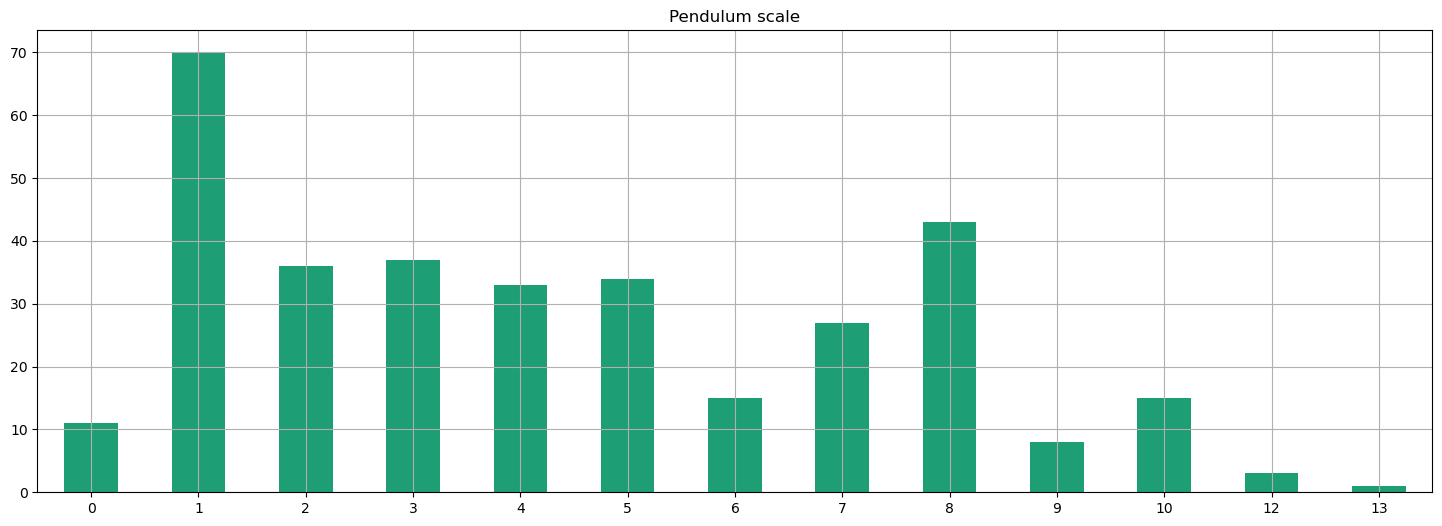

In [54]:
scales_colors = colors_dict['Pendulum Monster']
monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [55]:
monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1281.818182  1300.629218     0.0     0.0  1100.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               43.0  1211.627907   946.222893     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1900.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [56]:
monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1154.545455  1217.672892     0.0     0.0   700.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               43.0  1048.837209   761.693631     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1600.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [57]:
monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    11.0  5.636364  3.529100  1.0  2.00   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    43.0  3.860465  2.284330  1.0  2.00   4.0   5.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [58]:
monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link                                                                     
1       49        48          27          6            11           17   
2      187       187         103          6            23           32   
3       84        84          48          6            16           25   
4       44        41          24          6            16           21   
5        9         6           5          2             5            6   
6        2         2           2          1             1            2   

      Link Arrows  ATK  TCG status  OCG status  Page URL  Artwork  \
Link                                                                
1               8   10           3           5        49        1   
2              19   24           2           4       187        3   
3              17   18           3           2        84        2   
4              13   11           3           4        44        3   
5               3    4           3           2         9        0   
6               2    2           1           1         2        0   

      Modification date  Errata  
Link                             
1                    49       0  
2                   186       2  
3                    84       1  
4                    44       0  
5                     9       0  
6                     2       0

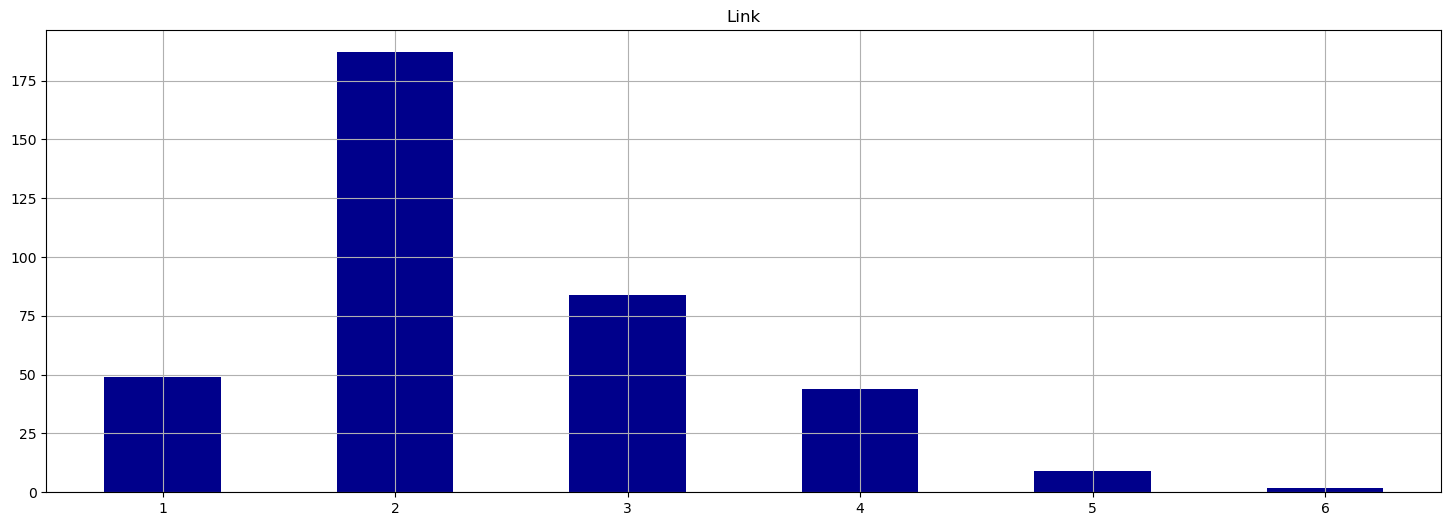

In [59]:
link_colors = colors_dict['Link Monster']
monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [60]:
monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      49.0   728.571429   476.969601     0.0   300.0   800.0  1000.0  1500.0
2     187.0  1410.427807   511.676381     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print('Total number of link arrow combinations:', monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [62]:
monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

Name  Password  Archseries  Attribute  Monster type  \
Link Arrows                                                         
(←,)             5         5           4          2             3   
(←, ↑)           4         4           2          2             3   
(←, →)          18        18           9          6             8   
(←, →, ↑)        8         8           5          4             5   
(↑,)            10        10           5          5             5   
...            ...       ...         ...        ...           ...   
(↙, ↘, ←, ↖)     1         1           1          1             1   
(↙, ↘, ↑)       22        22          15          6            11   
(↙, ↘, →)        2         2           2          2             2   
(↙, ↘, ↖)        2         2           0          2             2   
(↙, ↘, ↖, ↗)     1         1           1          1             1   

              Effect type  ATK  TCG status  OCG status  Page URL  Artwork  \
Link Arrows                                                                 
(←,)                    4    2           3           2         5        0   
(←, ↑)                  3    4           1           1         4        0   
(←, →)                  8   11           2           2        18        1   
(←, →, ↑)               7    6           1           1         8        0   
(↑,)                    9    6           1           1        10        0   
...                   ...  ...         ...         ...       ...      ...   
(↙, ↘, ←, ↖)            1    1           1           1         1        0   
(↙, ↘, ↑)              11   11           2           2        22        2   
(↙, ↘, →)               2    2           1           1         2        0   
(↙, ↘, ↖)               2    2           1           1         2        0   
(↙, ↘, ↖, ↗)            1    1           1           1         1        0   

              Modification date  Errata  
Link Arrows                              
(←,)                          5       0  
(←, ↑)                        4       0  
(←, →)                       18       0  
(←, →, ↑)                     8       0  
(↑,)                         10       0  
...                         ...     ...  
(↙, ↘, ←, ↖)                  1       0  
(↙, ↘, ↑)                    22       1  
(↙, ↘, →)                     2       0  
(↙, ↘, ↖)                     2       0  
(↙, ↘, ↖, ↗)                  1       0  

[62 rows x 13 columns]

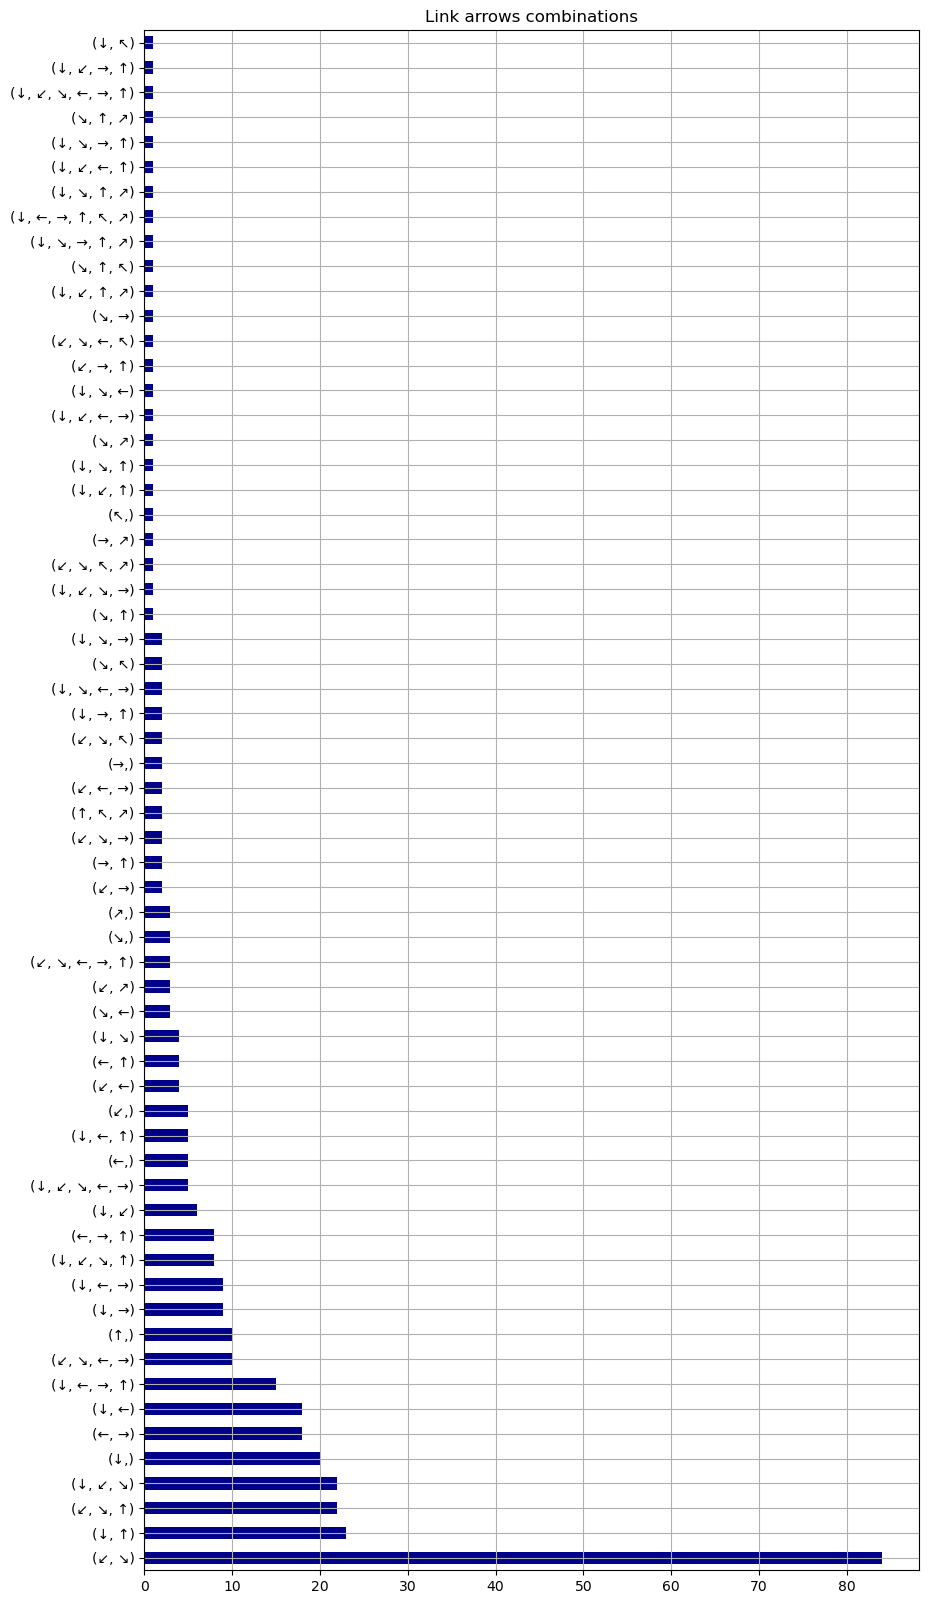

In [63]:
arrows_colors = colors_dict['Link Monster']
monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [64]:
monster_df[monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link Arrows                                                                     
←             117       111          46          6            21           35   
↑             118       115          45          6            20           31   
→             103        97          40          6            19           30   
↓             164       157          71          6            20           41   
↖              12        12           6          5             5            7   
↗              16        16           8          5             7            7   
↘             188       185         103          6            22           36   
↙             190       187         104          6            22           37   

             Link  ATK  TCG status  OCG status  Page URL  Artwork  \
Link Arrows                                                         
←               6   29           5           3       117        3   
↑               6   26           4           4       118        3   
→               6   27           4           3       103        2   
↓               6   31           4           5       164        3   
↖               5   10           1           2        12        2   
↗               6   11           1           2        16        2   
↘               6   32           4           4       188        3   
↙               6   33           4           5       190        3   

             Modification date  Errata  
Link Arrows                             
←                          117       0  
↑                          118       1  
→                          103       0  
↓                          164       0  
↖                           12       0  
↗                           16       0  
↘                          188       2  
↙                          190       2

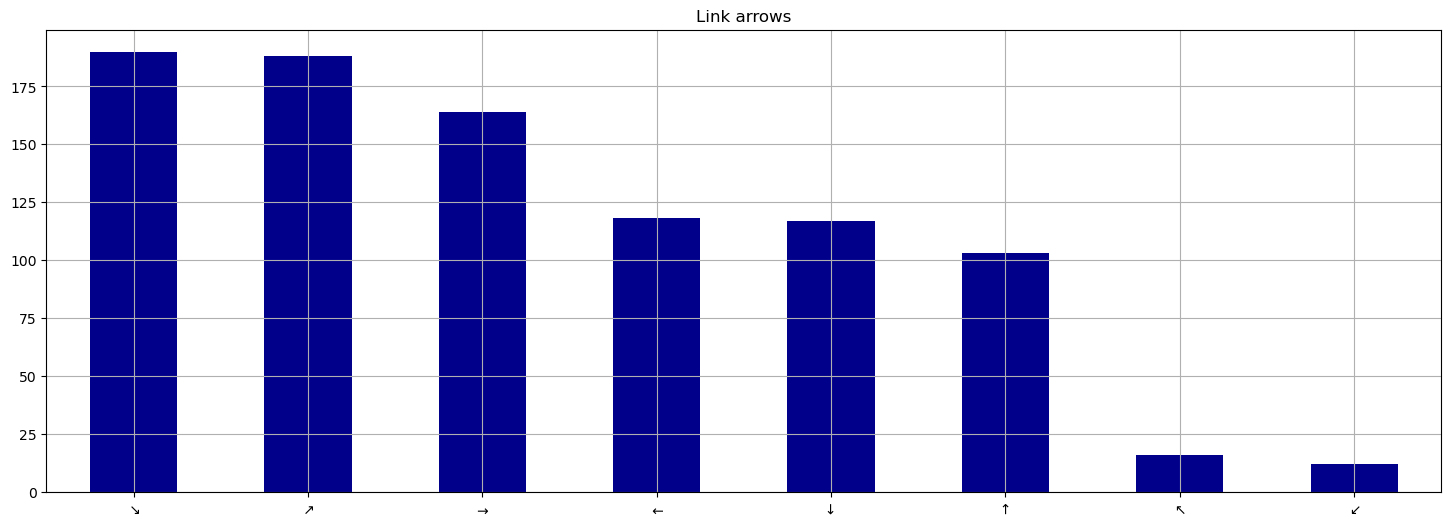

In [65]:
arrows_colors_b = colors_dict['Link Monster']
monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [66]:
arrow_per_link = monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link          1   2   3   4  5  6
Link Arrows                      
←             5  47  25  30  8  2
↑            10  30  44  28  4  2
→             2  33  26  31  9  2
↓            20  61  43  32  6  2
↖             1   3   5   2  0  1
↗             3   5   3   3  1  1
↘             3  96  54  25  9  1
↙             5  99  52  25  8  1

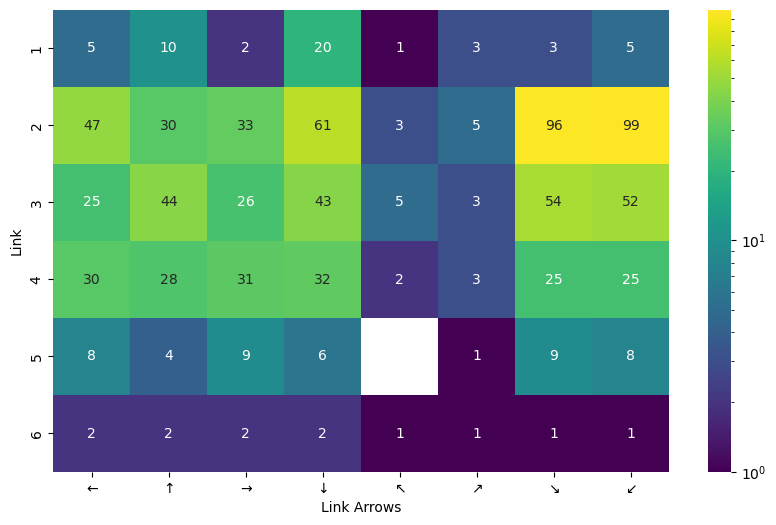

In [67]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

## Spell & Trap

### Properties

In [68]:
print('Total number of properties:', st_df['Property'].nunique())

Total number of properties: 9


In [69]:
st_df.drop(columns=['Card type']).groupby('Property').nunique()

Name  Password  Archseries  Effect type  TCG status  \
Property                                                                     
Continuous Spell Card   423       421         162           55           6   
Continuous Trap Card    495       486         163           64           3   
Counter Trap Card       158       155          60           19           2   
Equip Spell Card        264       264          75           37           3   
Field Spell Card        278       273         145           35           5   
Normal Spell Card       926       922         232           43           5   
Normal Trap Card       1174      1171         241           48           6   
Quick-Play Spell Card   434       431         140           35           3   
Ritual Spell Card        77        75          26            8           1   

                       OCG status  Page URL  Artwork  Modification date  \
Property                                                                  
Continuous Spell Card           4       423        2                419   
Continuous Trap Card            3       495        1                494   
Counter Trap Card               3       158        1                158   
Equip Spell Card                2       264        1                264   
Field Spell Card                5       279        1                279   
Normal Spell Card               6       927        3                925   
Normal Trap Card                5      1174        2               1170   
Quick-Play Spell Card           3       434        1                433   
Ritual Spell Card               2        77        1                 77   

                       Errata  
Property                       
Continuous Spell Card       3  
Continuous Trap Card        3  
Counter Trap Card           2  
Equip Spell Card            3  
Field Spell Card            3  
Normal Spell Card           3  
Normal Trap Card            2  
Quick-Play Spell Card       3  
Ritual Spell Card           2

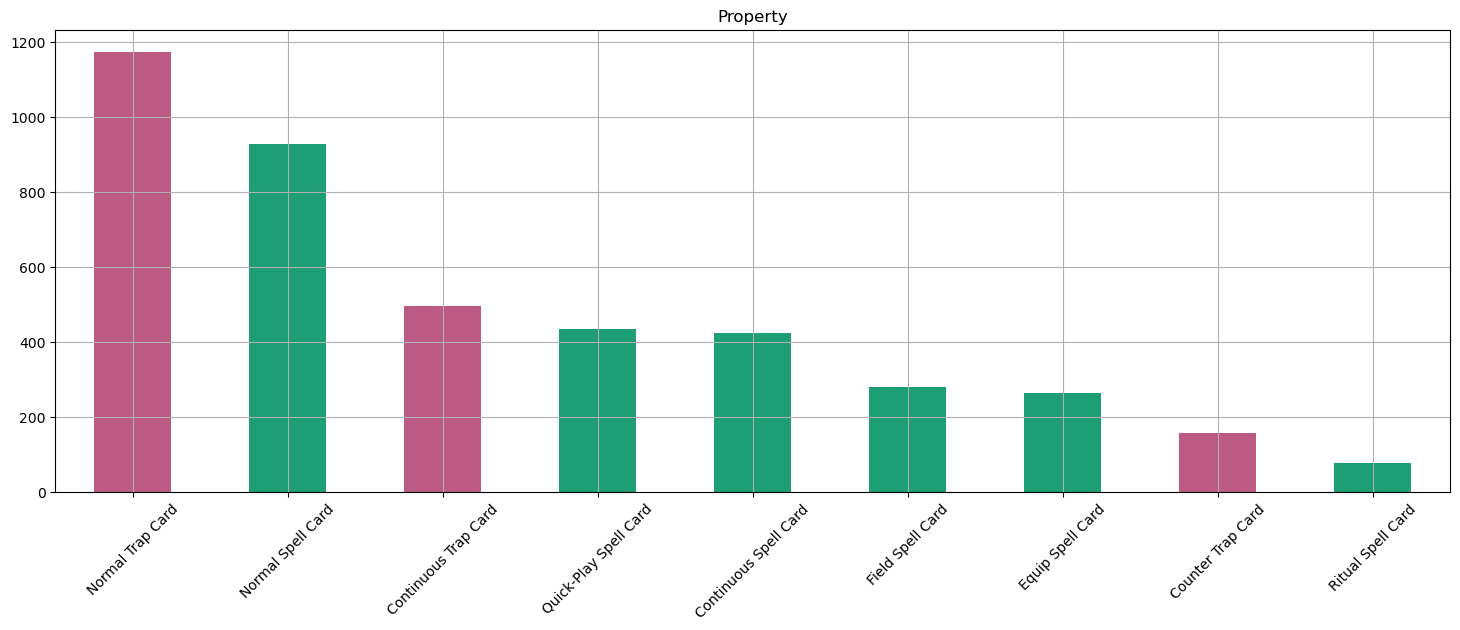

In [70]:
st_colors = [colors_dict[i] for i in cards_df[['Card type','Property']].value_counts().index.get_level_values(0)]
st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [71]:
print('Total number of effect types:', st_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [72]:
st_df.explode('Effect type').groupby('Effect type').nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     834       827          2         8         170   
Condition               1706      1687          2         9         379   
Continuous Effect         21        21          2         6          12   
Continuous-like Effect   905       897          2         7         238   
Cost                     451       449          2         7         112   
Effect                  2967      2944          2         9         435   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     450       445          1         6         186   
Lingering effect          96        96          2         6          43   
Maintenance cost          22        22          2         5           7   
Quick Effect               9         9          2         3           4   
Quick-like Effect        345       340          2         4         150   
Trigger Effect           854       846          2         9         262   
Unclassified effect       86        86          2         9          50   

                        TCG status  OCG status  Page URL  Artwork  \
Effect type                                                         
Activation condition             5           5       834        2   
Condition                        6           5      1707        2   
Continuous Effect                1           1        21        1   
Continuous-like Effect           6           5       906        2   
Cost                             5           4       451        2   
Effect                           6           6      2968        3   
Ignition Effect                  1           1         2        0   
Ignition-like Effect             4           5       450        2   
Lingering effect                 4           3        96        1   
Maintenance cost                 2           2        22        1   
Quick Effect                     1           1         9        0   
Quick-like Effect                4           4       345        1   
Trigger Effect                   4           5       854        1   
Unclassified effect              1           2        86        1   

                        Modification date  Errata  
Effect type                                        
Activation condition                  833       3  
Condition                            1692       3  
Continuous Effect                      21       2  
Continuous-like Effect                904       3  
Cost                                  451       3  
Effect                               2954       3  
Ignition Effect                         2       0  
Ignition-like Effect                  447       2  
Lingering effect                       96       2  
Maintenance cost                       22       1  
Quick Effect                            9       1  
Quick-like Effect                     345       1  
Trigger Effect                        847       3  
Unclassified effect                    86       1

#### Spell & Trap discrimination

In [41]:
st_diff = st_df[['Card type', 'Effect type']].explode('Effect type').value_counts().unstack(0).fillna(0).astype(int)
st_diff

Card type               Spell Card  Trap Card
Effect type                                  
Activation condition           244        590
Condition                     1156        552
Continuous Effect                7         14
Continuous-like Effect         621        285
Cost                           241        211
Effect                        1551       1418
Ignition Effect                  1          1
Ignition-like Effect           450          0
Lingering effect                56         40
Maintenance cost                11         11
Quick Effect                     4          5
Quick-like Effect                3        342
Trigger Effect                 576        279
Unclassified effect             64         22

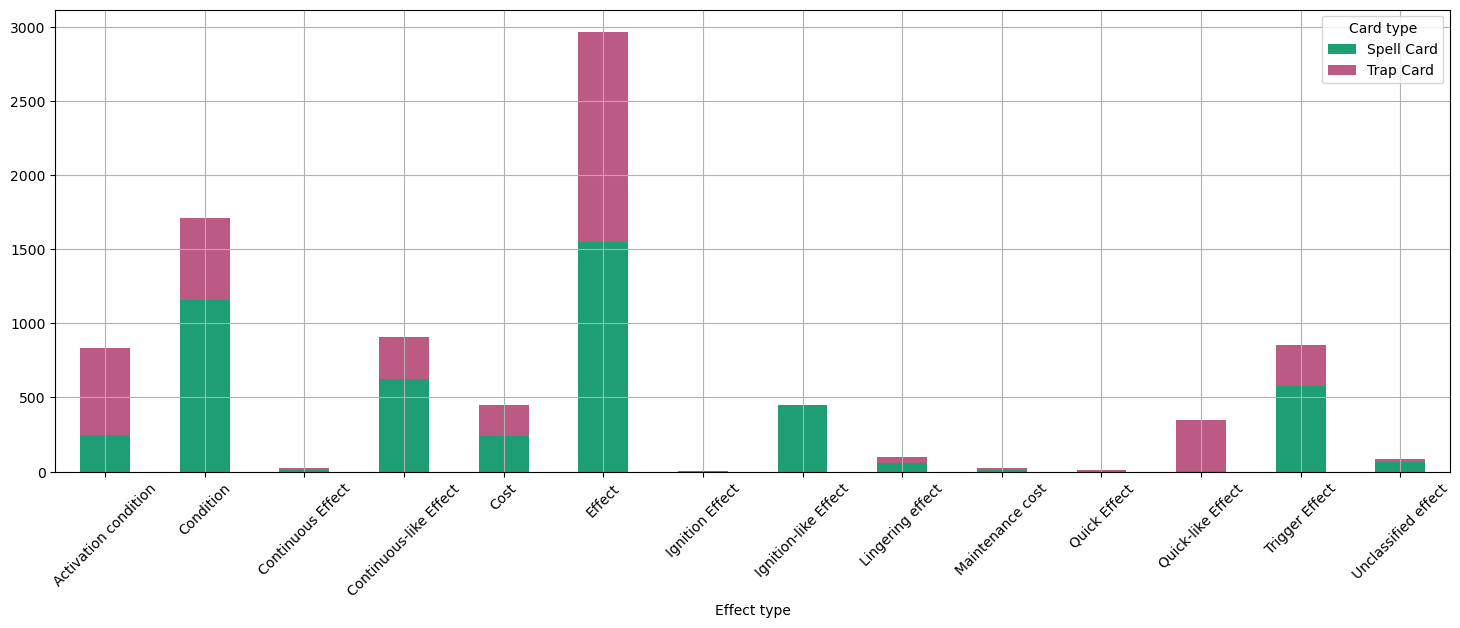

In [42]:
st_diff_colors = {'Spell Card': colors_dict['Spell Card'], 'Trap Card': colors_dict['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors)
plt.show()

## Archseries

In [75]:
exploded_archseries = cards_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries: 719


In [76]:
exploded_archseries.groupby('Archseries').nunique()

Name  Password  Card type  Property  Effect type  \
Archseries                                                            
"C"                   9         9          1         0            7   
-Eyes Dragon         73        73          1         0           44   
/Assault Mode         7         7          1         0            5   
@Ignister            18        18          1         0            9   
A-to-Z               16        16          1         0            5   
...                 ...       ...        ...       ...          ...   
sphinx               10        10          2         1            9   
sprout                2         2          1         0            2   
tellarknight         25        25          2         4           12   
with Chain            4         4          1         1            4   
with Eyes of Blue     8         8          2         2            6   

                   TCG status  OCG status  Page URL  Artwork  \
Archseries                                                     
"C"                         2           1         9        0   
-Eyes Dragon                2           2        73        1   
/Assault Mode               1           1         7        0   
@Ignister                   1           1        18        0   
A-to-Z                      1           1        16        2   
...                       ...         ...       ...      ...   
sphinx                      1           1        10        0   
sprout                      1           1         2        0   
tellarknight                1           2        25        0   
with Chain                  1           1         4        1   
with Eyes of Blue           1           1         8        0   

                   Modification date  Errata  Attribute  Primary type  \
Archseries                                                              
"C"                                9       1          1             2   
-Eyes Dragon                      73       3          6             7   
/Assault Mode                      7       0          5             1   
@Ignister                         18       0          6             6   
A-to-Z                            16       2          1             3   
...                              ...     ...        ...           ...   
sphinx                            10       0          2             1   
sprout                             2       0          1             1   
tellarknight                      25       0          2             2   
with Chain                         4       0          0             0   
with Eyes of Blue                  8       1          1             1   

                   Secondary type  Monster type  DEF  Pendulum Scale  Link  \
Archseries                                                                   
"C"                             0             1    8               0     0   
-Eyes Dragon                    2             3   12               6     1   
/Assault Mode                   0             6    6               0     0   
@Ignister                       1             1    9               0     3   
A-to-Z                          1             1   12               0     0   
...                           ...           ...  ...             ...   ...   
sphinx                          0             2    5               0     0   
sprout                          0             1    1               0     0   
tellarknight                    0             4   15               2     0   
with Chain                      0             0    0               0     0   
with Eyes of Blue               1             1    4               0     0   

                   Link Arrows  ATK  Level/Rank  
Archseries                                       
"C"                          0    9           8  
-Eyes Dragon                 1   15          10  
/Assault Mode                0    6           5  
@Ignister                    4   10           7

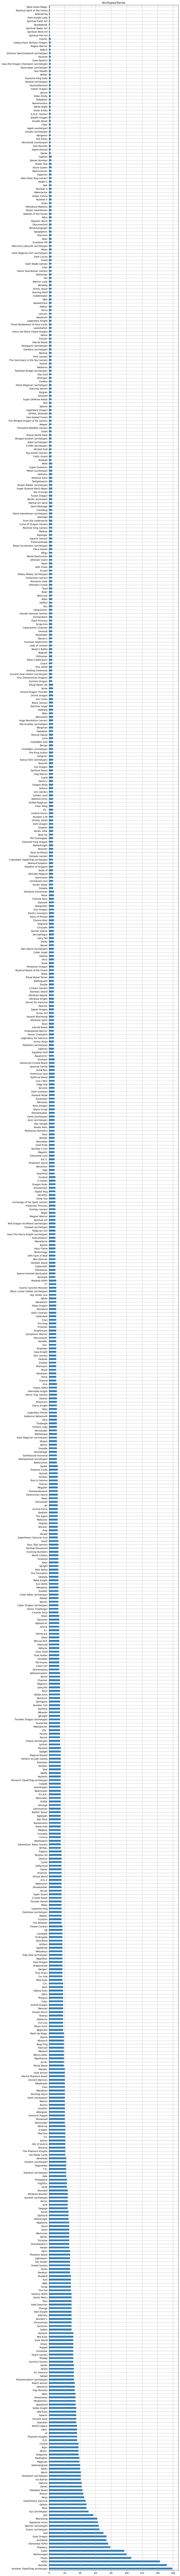

In [77]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [78]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type          Monster Card  Spell Card  Trap Card   All
Archseries                                                  
"C"                           9           0          0     9
-Eyes Dragon                 74           0          0    74
/Assault Mode                 7           0          0     7
@Ignister                    18           0          0    18
A-to-Z                       16           0          0    16
...                         ...         ...        ...   ...
sprout                        2           0          0     2
tellarknight                 20           5          0    25
with Chain                    0           0          4     4
with Eyes of Blue             5           3          0     8
All                        7380        1384        911  9675

[720 rows x 4 columns]

### By primary type

In [79]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type       Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                        
"C"                             8               0             0   
-Eyes Dragon                   31              11             1   
/Assault Mode                   7               0             0   
@Ignister                      10               1             4   
A-to-Z                          6               8             0   
...                           ...             ...           ...   
sphinx                          9               0             0   
sprout                          2               0             0   
tellarknight                   14               0             0   
with Eyes of Blue               5               0             0   
All                          4729             543           342   

Primary type       Monster Token  Normal Monster  Ritual Monster  \
Archseries                                                         
"C"                            0               1               0   
-Eyes Dragon                   0               4               4   
/Assault Mode                  0               0               0   
@Ignister                      0               0               1   
A-to-Z                         0               2               0   
...                          ...             ...             ...   
sphinx                         0               0               0   
sprout                         0               0               0   
tellarknight                   0               0               0   
with Eyes of Blue              0               0               0   
All                           28             220             127   

Primary type       Synchro Monster  Xyz Monster   All  
Archseries                                             
"C"                              0            0     9  
-Eyes Dragon                     5           18    74  
/Assault Mode                    0            0     7  
@Ignister                        1            1    18  
A-to-Z                           0            0    16  
...                            ...          ...   ...  
sphinx                           0            0     9  
sprout                           0            0     2  
tellarknight                     0            6    20  
with Eyes of Blue                0            0     5  
All                            448          943  7380  

[655 rows x 9 columns]



### By secondary type

In [80]:
exploded_archseries_secondary_type = exploded_archseries[['Archseries', 'Secondary type']].explode('Secondary type')
archseries_crosstab_c = pd.crosstab(exploded_archseries_secondary_type['Archseries'],exploded_archseries_secondary_type['Secondary type'], margins = True)
archseries_crosstab_c

Secondary type     Flip monster  Gemini monster  Spirit monster  Toon monster  \
Archseries                                                                      
-Eyes Dragon                  0               2               0             2   
@Ignister                     0               0               0             0   
A-to-Z                        0               0               0             0   
Adamancipator                 0               0               0             0   
Alien                         1               1               0             0   
...                         ...             ...             ...           ...   
itsu                          0               0               0             0   
lswarm                        2               0               0             0   
roid                          0               0               0             0   
with Eyes of Blue             0               0               0             0   
All                         128              28              13            36   

Secondary type     Tuner monster  Union monster  All  
Archseries                                            
-Eyes Dragon                   0              0    4  
@Ignister                      1              0    1  
A-to-Z                         0              6    6  
Adamancipator                  3              0    3  
Alien                          1              0    3  
...                          ...            ...  ...  
itsu                           0              2    2  
lswarm                         0              0    2  
roid                           9              0    9  
with Eyes of Blue              5              0    5  
All                          434             18  657  

[202 rows x 7 columns]

### By monster type

In [81]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type       Aqua  Beast  Beast-Warrior  Creator God  Cyberse  Dinosaur  \
Archseries                                                                      
"C"                   0      0              0            0        0         0   
-Eyes Dragon          0      0              0            0        0         0   
/Assault Mode         0      0              0            0        0         0   
@Ignister             0      0              0            0       18         0   
A-to-Z                0      0              0            0        0         0   
...                 ...    ...            ...          ...      ...       ...   
sphinx                0      3              0            0        0         0   
sprout                0      0              0            0        0         0   
tellarknight          0      0              0            0        0         0   
with Eyes of Blue     0      0              0            0        0         0   
All                 196    296            186            2      158        90   

Monster type       Divine-Beast  Dragon  Fairy  Fiend  Fish  Insect  Machine  \
Archseries                                                                     
"C"                           0       0      0      0     0       9        0   
-Eyes Dragon                  0      69      0      0     0       0        2   
/Assault Mode                 0       2      0      0     0       0        1   
@Ignister                     0       0      0      0     0       0        0   
A-to-Z                        0       0      0      0     0       0       16   
...                         ...     ...    ...    ...   ...     ...      ...   
sphinx                        0       0      0      0     0       0        0   
sprout                        0       0      0      0     0       0        0   
tellarknight                  0       0      0      1     0       0        0   
with Eyes of Blue             0       0      0      0     0       0        0   
All                           8     732    458    701    75     163     1002   

Monster type       Plant  Psychic  Pyro  Reptile  Rock  Sea Serpent  \
Archseries                                                            
"C"                    0        0     0        0     0            0   
-Eyes Dragon           0        0     0        0     0            0   
/Assault Mode          0        1     0        0     0            0   
@Ignister              0        0     0        0     0            0   
A-to-Z                 0        0     0        0     0            0   
...                  ...      ...   ...      ...   ...          ...   
sphinx                 0        0     0        0     6            0   
sprout                 2        0     0        0     0            0   
tellarknight           0        0     0        0     0            0   
with Eyes of Blue      0        0     0        0     0            0   
All                  183      158    96      138   216           71   

Monster type       Spellcaster  Thunder  Warrior  Winged Beast  Wyrm  Zombie  \
Archseries                                                                     
"C"                          0        0        0             0     0       0   
-Eyes Dragon                 0        0        0             0     0       3   
/Assault Mode                1        0        1             0     0       1   
@Ignister                    0        0        0             0     0       0   
A-to-Z                       0        0        0             0     0       0   
...                        ...      ...      ...           ...   ...     ...   
sphinx                       0        0        0             0     0       0   
sprout                       0        0        0             0     0       0   
tellarknight                 1        0       17             0     1       0   
with Eyes of Blue            5        0        0             0     0       0   
All                  

### By property

In [82]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property           Continuous Spell Card  Continuous Trap Card  \
Archseries                                                       
A.I.                                   1                     3   
Abyss Actor                            0                     0   
Abyss Script                           1                     0   
Abyss-                                 0                     1   
Adamancipator                          0                     0   
...                                  ...                   ...   
sphinx                                 0                     1   
tellarknight                           1                     0   
with Chain                             0                     0   
with Eyes of Blue                      1                     0   
All                                  247                   291   

Property           Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                 
A.I.                               0                 0                 1   
Abyss Actor                        0                 0                 0   
Abyss Script                       0                 0                 0   
Abyss-                             0                 3                 0   
Adamancipator                      1                 0                 1   
...                              ...               ...               ...   
sphinx                             0                 0                 0   
tellarknight                       0                 1                 1   
with Chain                         0                 0                 0   
with Eyes of Blue                  0                 0                 0   
All                               75               133               183   

Property           Normal Spell Card  Normal Trap Card  Quick-Play Spell Card  \
Archseries                                                                      
A.I.                               4                 1                      2   
Abyss Actor                        1                 2                      0   
Abyss Script                       5                 0                      1   
Abyss-                             0                 3                      0   
Adamancipator                      2                 1                      0   
...                              ...               ...                    ...   
sphinx                             0                 0                      0   
tellarknight                       0                 0                      2   
with Chain                         0                 4                      0   
with Eyes of Blue                  0                 0                      2   
All                              518               545                    262   

Property           Ritual Spell Card   All  
Archseries                                  
A.I.                               1    13  
Abyss Actor                        0     3  
Abyss Script                       0     7  
Abyss-                             0     7  
Adamancipator                      0     5  
...                              ...   ...  
sphinx                             0     1  
tellarknight                       0     5  
with Chain                         0     4  
with Eyes of Blue                  0     3  
All                               41  2295  

[403 rows x 10 columns]

## Artworks

In [83]:
print('Total number of cards with edited or alternate artworks:', cards_df['Artwork'].count())

Total number of cards with edited or alternate artworks: 637


In [84]:
cards_df[['Name','Password','TCG status','OCG status','Artwork']][cards_df['Artwork'].notna()]

Name  Password TCG status OCG status    Artwork
16           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
29      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
48                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
52       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
62     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12162         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12276                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12278              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12280               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12283            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[637 rows x 5 columns]

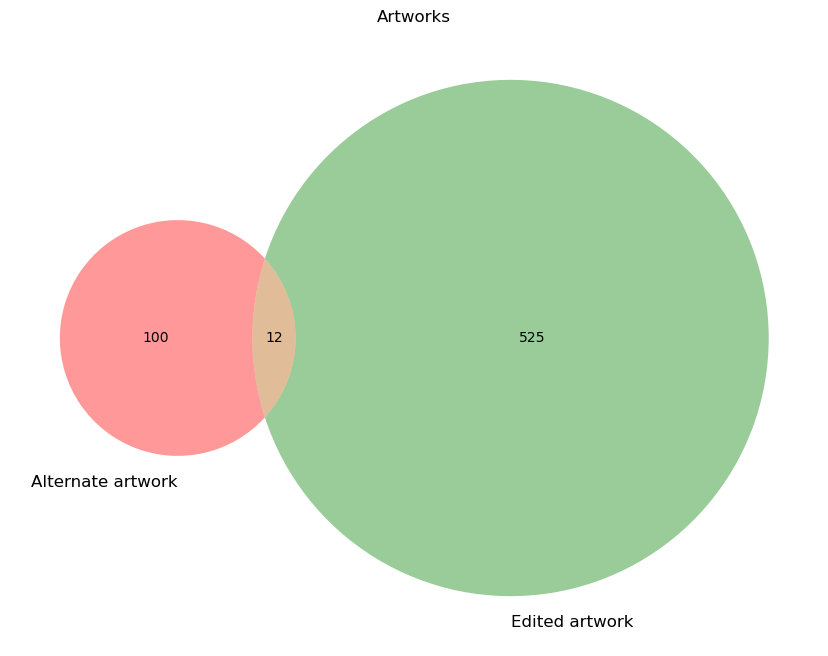

In [85]:
artwork_value_counts = cards_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [86]:
artwork_crosstab = pd.crosstab(cards_df['Artwork'], cards_df['Card type'])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   88           7          5
(Alternate, Edited)            11           1          0
(Edited,)                     296         119        110

### By primary type

In [87]:
artwork_crosstab_b = pd.crosstab(cards_df['Artwork'], cards_df['Primary type'])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     36              13             9   
(Alternate, Edited)               3               1             5   
(Edited,)                       193              22            10   

Primary type         Monster Token  Normal Monster  Ritual Monster  \
Artwork                                                              
(Alternate,)                     5              17               0   
(Alternate, Edited)              0               2               0   
(Edited,)                        0              43               7   

Primary type         Synchro Monster  Xyz Monster  
Artwork                                            
(Alternate,)                       3            5  
(Alternate, Edited)                0            0  
(Edited,)                          5           16

More granularity is unnecessary

## Errata

In [7]:
print('Total number of cards with errata:', cards_df['Errata'].count())

Total number of cards with errata: 4890


In [8]:
cards_df[['Name','Password','TCG status','OCG status','Errata']][cards_df['Errata'].notna()]

Name  Password TCG status OCG status   Errata
0          "A" Cell Breeding Device  34541863  Unlimited  Unlimited  (Name,)
4      "Infernoble Arms - Durendal"  37478723  Unlimited  Unlimited   (Any,)
8                    3-Hump Lacooda  86988864  Unlimited  Unlimited   (Any,)
10        4-Starred Ladybug of Doom  83994646  Unlimited  Unlimited   (Any,)
13                      7 Completed  86198326  Unlimited  Unlimited  (Type,)
...                             ...       ...        ...        ...      ...
12299              Zoodiac Whiptail  31755044  Unlimited  Unlimited   (Any,)
12302                 Zubaba Buster  57036718  Unlimited  Unlimited   (Any,)
12304                 Zubaba Knight  97896503  Unlimited  Unlimited   (Any,)
12307    Zure, Knight of Dark World  07459013  Unlimited  Unlimited  (Type,)
12308     Zushin the Sleeping Giant  67547370  Unlimited  Unlimited   (Any,)

[4890 rows x 5 columns]

In [70]:
errata_counts = cards_df.groupby('Errata').nunique().sort_values('Name',ascending=False)
errata_counts

Name  Password  Card type  Property  Archseries  Effect type  \
Errata                                                                       
(Any,)        3612      3607          3         9         618          220   
(Type,)        751       744          3         9         181           83   
(Name,)        403       403          3         9         133           76   
(Name, Type)   123       121          3         6          59           38   

              TCG status  OCG status  Page URL  Artwork  Modification date  \
Errata                                                                       
(Any,)                 5           5      3612        3               3598   
(Type,)                4           5       751        3                750   
(Name,)                4           3       403        2                403   
(Name, Type)           3           3       123        3                123   

              Attribute  Primary type  Secondary type  Monster type  DEF  \
Errata                                                                     
(Any,)                7             7               8            24   58   
(Type,)               7             8               6            24   42   
(Name,)               6             7               3            22   36   
(Name, Type)          7             6               5            16   28   

              Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
Errata                                                            
(Any,)                     9     4           10   70          13  
(Type,)                    5     2            2   52          12  
(Name,)                    4     1            1   41          11  
(Name, Type)               0     0            0   34          10

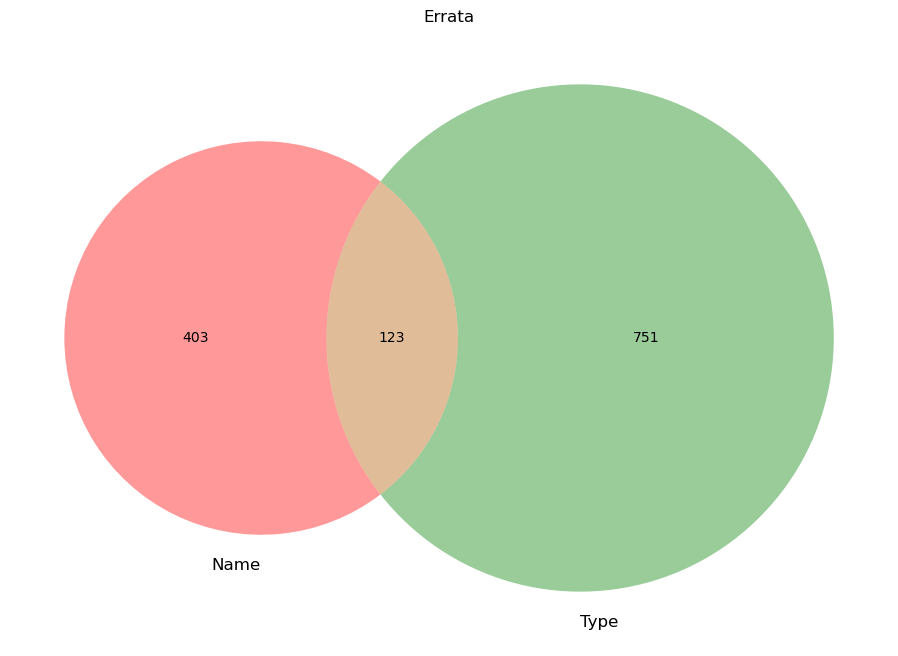

In [67]:
plt.figure(figsize=(20,8))
plt.title('Errata')
sorted_errata_name_counts=errata_counts['Name'].drop(('Any',)).sort_index(key=lambda x: [(len(i),i) for i in x])
venn2(subsets = sorted_errata_name_counts, set_labels=sorted_errata_name_counts.index[:-1].str[0])
plt.show()

### By card type

In [73]:
errata_crosstab = pd.crosstab(cards_df['Errata'], cards_df['Card type'])
errata_crosstab.sort_values(by=errata_crosstab.columns.tolist(),ascending=False)

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Any,)                2268         689        655
(Type,)                528         213         10
(Name,)                291          60         52
(Name, Type)           101          21          2

### By primary type

In [75]:
errata_crosstab_b = pd.crosstab(cards_df['Errata'], cards_df['Primary type'])
errata_crosstab_b.sort_values(by=errata_crosstab_b.columns.tolist(),ascending=False)

Primary type  Effect Monster  Fusion Monster  Link Monster  Monster Token  \
Errata                                                                      
(Any,)                  1706             135            15              0   
(Type,)                  334              28             2              6   
(Name,)                  191              46             4              0   
(Name, Type)              46              10             0              0   

Primary type  Normal Monster  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                                      
(Any,)                    61              38              139          174  
(Type,)                  110               2               29           17  
(Name,)                   32               2                9            7  
(Name, Type)              36               3                5            1

More granularity is unnecessary

### By artwork

In [91]:
errata_crosstab_c = pd.crosstab(cards_df['Artwork'], cards_df['Errata'])
errata_crosstab_c.sort_values(by=errata_crosstab_c.columns.tolist(),ascending=False)

Errata               (Any,)  (Name,)  (Name, Type)  (Type,)
Artwork                                                    
(Edited,)               183       22            17       61
(Alternate,)             32        4            21       27
(Alternate, Edited)       1        0             3        2

## TCG & OCG status

### TGC status

In [94]:
print('Total number of TCG status:', cards_df['TCG status'].nunique())

Total number of TCG status: 7


In [95]:
cards_df.groupby('TCG status', dropna=False).nunique()

Name  Password  Card type  Property  Archseries  \
TCG status                                                           
Forbidden           104       104          3         7          58   
Illegal              35         0          3         3           4   
Legal                25         0          1         0          16   
Limited              80        80          3         5          41   
Not yet released     28        28          3         7          16   
Semi-Limited          5         5          3         3           5   
Unlimited         11627     11624          3         9        1156   
NaN                 397       325          3         9         100   

                  Effect type  OCG status  Page URL  Artwork  \
TCG status                                                     
Forbidden                  49           4       104        1   
Illegal                     6           1        35        0   
Legal                       0           1        25        1   
Limited                    37           4        80        3   
Not yet released           20           1        28        0   
Semi-Limited                5           2         5        0   
Unlimited                 353           5     11629        3   
NaN                        77           4       397        1   

                  Modification date  Errata  Attribute  Primary type  \
TCG status                                                             
Forbidden                       104       3          6             5   
Illegal                          35       0          5             5   
Legal                            25       1          6             1   
Limited                          80       3          6             6   
Not yet released                 26       0          4             6   
Semi-Limited                      5       1          2             2   
Unlimited                     11519       3          7             7   
NaN                             397       1          7             8   

                  Secondary type  Monster type  DEF  Pendulum Scale  Link  \
TCG status                                                                  
Forbidden                      2            19   20               2     4   
Illegal                        0            13    9               2     2   
Legal                          0            13    6               0     0   
Limited                        2            15   18               2     1   
Not yet released               0             6    7               1     2   
Semi-Limited                   0             2    2               0     0   
Unlimited                      8            24   74              13     6   
NaN                            3            24   40               7     4   

                  Link Arrows  ATK  Level/Rank  
TCG status                                      
Forbidden                  10   26          12  
Illegal                     2    8           5  
Legal                       0    5           6  
Limited                     1   23           9  
Not yet released            2    6           4  
Semi-Limited                0    2           2  
Unlimited                  60   79          14  
NaN                         5   53          12

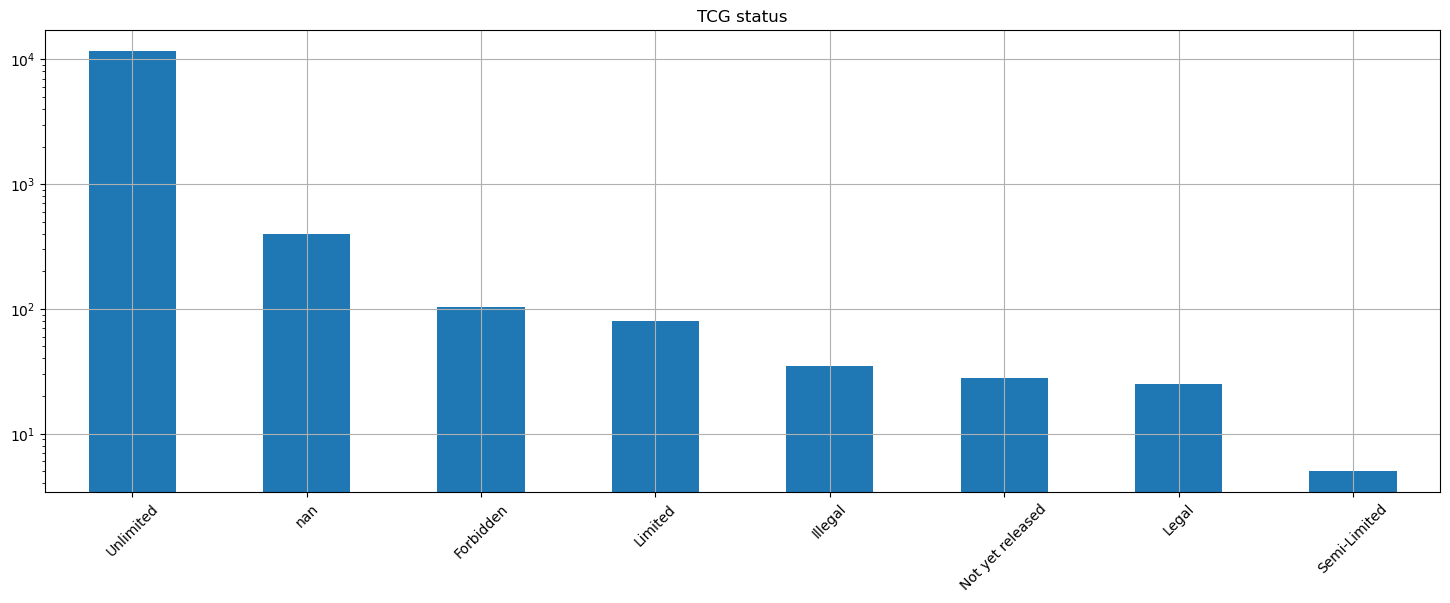

In [96]:
cards_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [97]:
# Remove unlimited
tcg_crosstab = pd.crosstab(cards_df['Card type'], cards_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

TCG status    Forbidden  Illegal  Legal  Limited  Not yet released  \
Card type                                                            
Monster Card         68       32     25       45                11   
Spell Card           26        2      0       33                12   
Trap Card            10        1      0        2                 5   

TCG status    Semi-Limited  
Card type                   
Monster Card             2  
Spell Card               2  
Trap Card                1

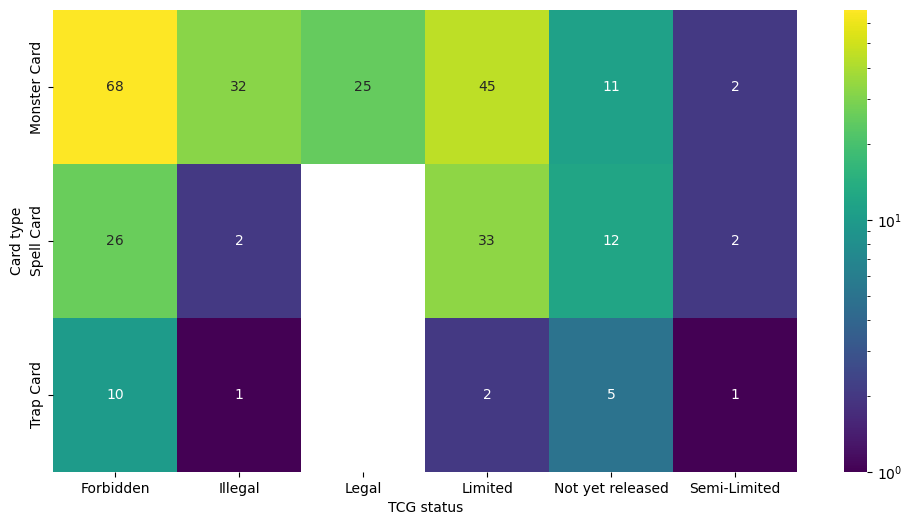

In [98]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [99]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(cards_df['Monster type'], cards_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Legal  Limited  Not yet released  \
Monster type                                                          
Aqua                   2        0      2        4                 0   
Beast                  0        3      1        2                 0   
Beast-Warrior          2        3      0        2                 0   
Cyberse                2        0      1        1                 1   
Dinosaur               0        0      1        2                 0   
Divine-Beast           0        0      0        0                 0   
Dragon                11        3      1        6                 2   
Fairy                  4        4      3        6                 0   
Fiend                  5        2      4        2                 0   
Fish                   1        0      0        0                 0   
Insect                 2        0      0        0                 2   
Machine                6        4      3        4                 0   
Plant                  6        1      0        0                 2   
Psychic                2        1      0        1                 0   
Pyro                   0        0      0        0                 0   
Reptile                1        0      1        1                 0   
Rock                   2        1      1        4                 0   
Sea Serpent            1        0      0        0                 0   
Spellcaster            8        5      1        7                 1   
Thunder                2        1      0        0                 0   
Warrior                4        2      2        2                 3   
Winged Beast           3        2      0        1                 0   
Wyrm                   4        0      0        0                 0   
Zombie                 0        0      1        0                 0   

TCG status     Semi-Limited  
Monster type                 
Aqua                      0  
Beast                     0  
Beast-Warrior             0  
Cyberse                   0  
Dinosaur                  0  
Divine-Beast              0  
Dragon                    0  
Fairy                     0  
Fiend                     0  
Fish                      0  
Insect                    0  
Machine                   0  
Plant                     0  
Psychic                   0  
Pyro                      0  
Reptile                   0  
Rock                      0  
Sea Serpent               0  
Spellcaster               0  
Thunder                   0  
Warrior                   1  
Winged Beast              1  
Wyrm                      0  
Zombie                    0

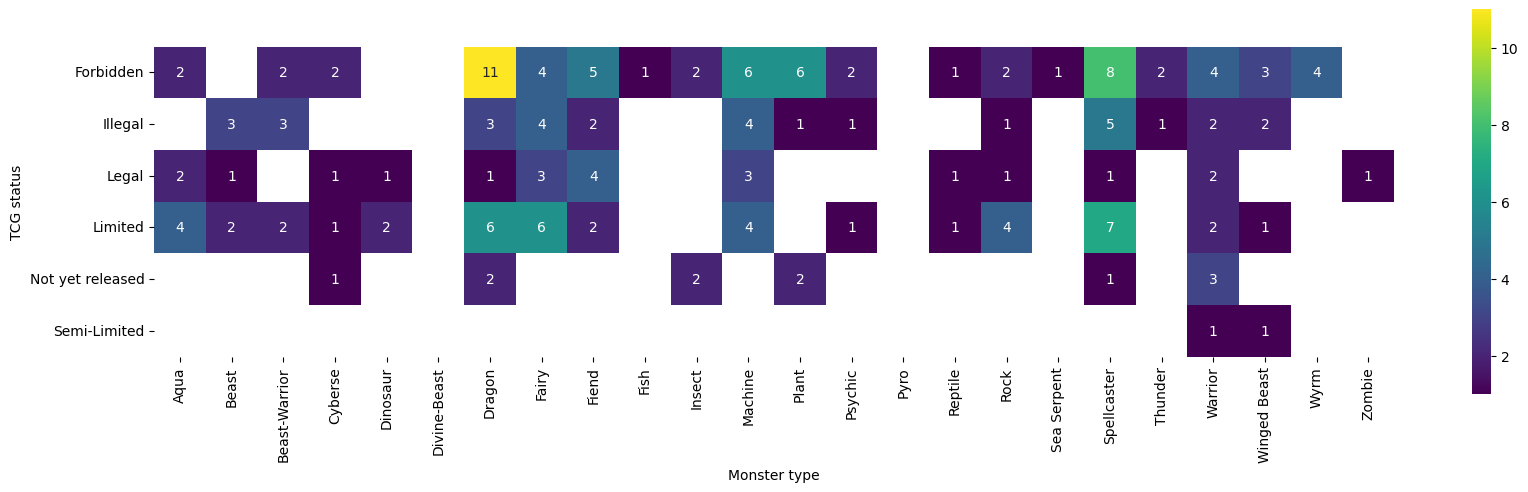

In [100]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [101]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Legal  Limited  Semi-Limited  \
Archseries                                                                    
-Eyes Dragon                       1        0      0        0             0   
Adventurer Token (series)          0        0      0        0             0   
Amazoness                          0        0      0        0             0   
Ancient Gear                       0        0      1        0             0   
Attribute Knight                   0        0      0        1             0   
...                              ...      ...    ...      ...           ...   
Zexal                              1        0      0        0             0   
Zoodiac                            3        0      0        1             0   
roid                               0        0      0        1             0   
tellarknight                       0        0      0        0             0   
All                               64       35     19       37             4   

TCG status                 Unlimited  All  
Archseries                                 
-Eyes Dragon                       0    1  
Adventurer Token (series)          2    2  
Amazoness                          1    1  
Ancient Gear                       0    1  
Attribute Knight                   0    1  
...                              ...  ...  
Zexal                              0    1  
Zoodiac                            0    4  
roid                               0    1  
tellarknight                       1    1  
All                               72  231  

[124 rows x 7 columns]

### OCG status

In [102]:
print('Total number of OCG status:', cards_df['OCG status'].nunique())

Total number of OCG status: 7


In [103]:
cards_df.groupby('OCG status', dropna=False).nunique()

Name  Password  Card type  Property  Archseries  \
OCG status                                                           
Forbidden            87        87          3         6          45   
Illegal              29         1          3         2           6   
Legal                41         0          1         0          25   
Limited              76        76          3         6          43   
Not yet released     28         1          3         6           8   
Semi-Limited         23        23          2         4          14   
Unlimited         11964     11936          3         9        1171   
NaN                  49        37          3         6           6   

                  Effect type  TCG status  Page URL  Artwork  \
OCG status                                                     
Forbidden                  40           3        87        1   
Illegal                     8           1        29        0   
Legal                       0           1        41        1   
Limited                    34           3        76        3   
Not yet released           15           1        28        0   
Semi-Limited               17           4        23        2   
Unlimited                 356           5     11970        3   
NaN                        17           2        49        0   

                  Modification date  Errata  Attribute  Primary type  \
OCG status                                                             
Forbidden                        87       3          6             5   
Illegal                          29       0          5             6   
Legal                            41       1          7             1   
Limited                          76       2          6             6   
Not yet released                 28       0          6             7   
Semi-Limited                     23       2          4             2   
Unlimited                     11860       3          7             7   
NaN                              49       1          6             5   

                  Secondary type  Monster type  DEF  Pendulum Scale  Link  \
OCG status                                                                  
Forbidden                      3            19   20               3     4   
Illegal                        1            11   12               2     2   
Legal                          0            16    7               0     0   
Limited                        2            15   21               3     3   
Not yet released               2             7   12               0     1   
Semi-Limited                   1             6    6               0     2   
Unlimited                      8            25   75              13     6   
NaN                            1            15   15               0     1   

                  Link Arrows  ATK  Level/Rank  
OCG status                                      
Forbidden                   8   23          11  
Illegal                     2   11           8  
Legal                       0    7           7  
Limited                     3   21           9  
Not yet released            1   17           8  
Semi-Limited                2    8           4  
Unlimited                  60   80          14  
NaN                         2   13           6

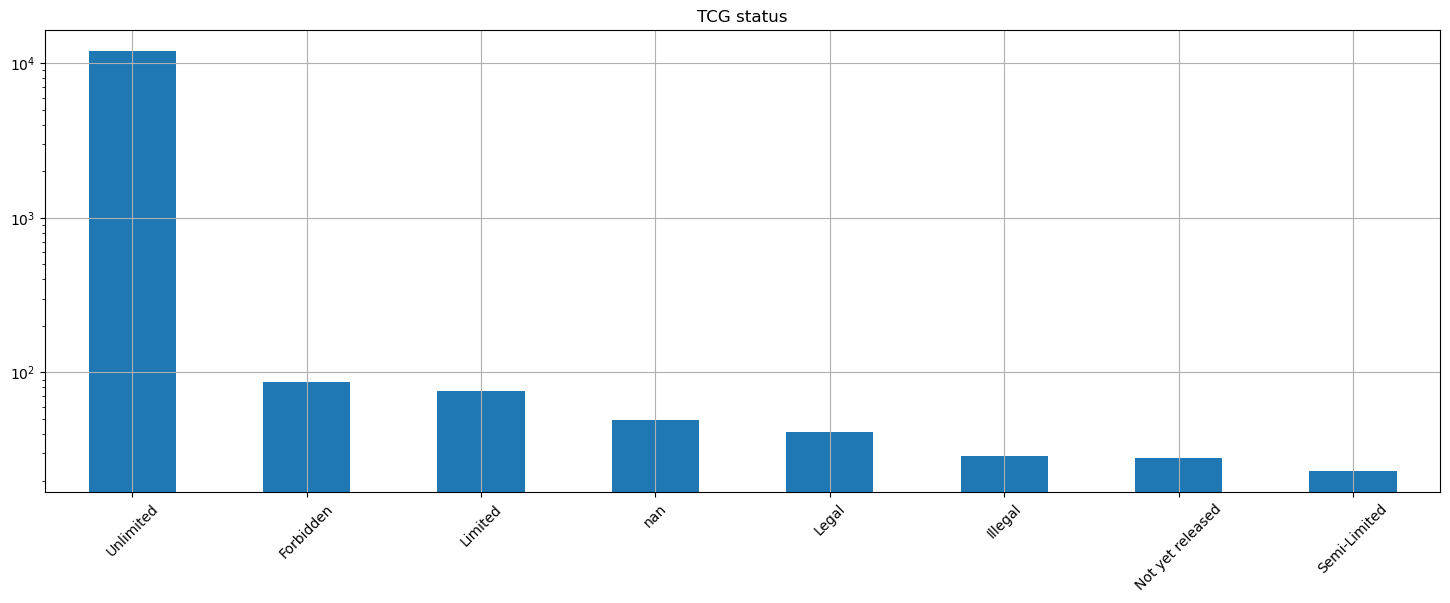

In [104]:
cards_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [105]:
# Remove unlimited
ocg_crosstab = pd.crosstab(cards_df['Card type'], cards_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

OCG status    Forbidden  Illegal  Legal  Limited  Not yet released  \
Card type                                                            
Monster Card         56       27     41       44                19   
Spell Card           21        1      0       29                 6   
Trap Card            10        1      0        3                 3   

OCG status    Semi-Limited  
Card type                   
Monster Card             8  
Spell Card              15  
Trap Card                0

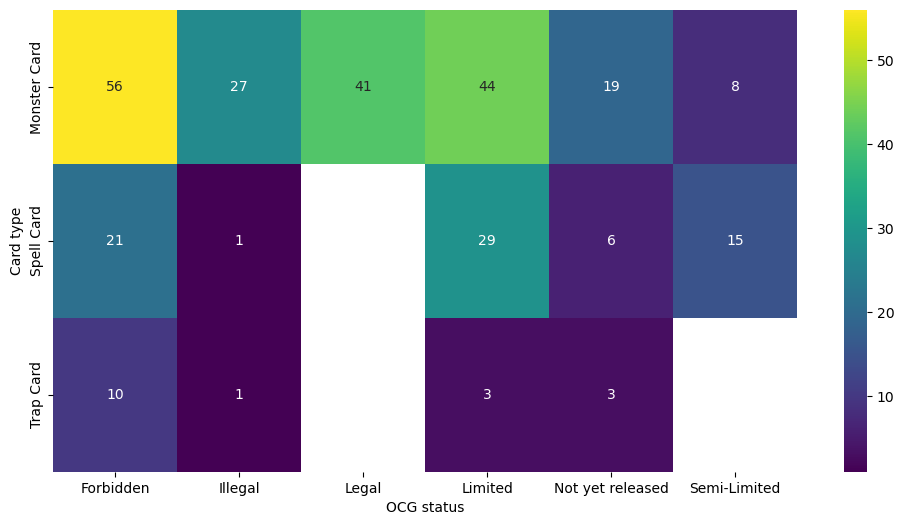

In [106]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [107]:
ocg_crosstab_b = pd.crosstab(cards_df['Monster type'], cards_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Legal  Limited  Not yet released  \
Monster type                                                          
Aqua                   3        0      2        1                 0   
Beast                  1        2      4        0                 0   
Beast-Warrior          3        2      0        1                 3   
Creator God            0        0      0        0                 0   
Cyberse                2        0      2        1                 1   
Dinosaur               0        0      1        1                 5   
Divine-Beast           0        0      0        0                 0   
Dragon                 9        3      1        6                 3   
Fairy                  2        3      4        4                 0   
Fiend                  5        1      7        0                 0   
Fish                   1        0      0        0                 0   
Insect                 1        0      0        0                 0   
Machine                5        3      6        6                 2   
Plant                  5        0      1        1                 0   
Psychic                1        1      0        5                 0   
Pyro                   0        0      0        1                 0   
Reptile                1        0      1        0                 0   
Rock                   1        1      1        2                 0   
Sea Serpent            1        0      0        0                 0   
Spellcaster            7        7      1        8                 1   
Thunder                0        0      1        3                 0   
Warrior                3        3      3        3                 4   
Winged Beast           3        1      1        1                 0   
Wyrm                   2        0      0        0                 0   
Zombie                 0        0      2        0                 0   

OCG status     Semi-Limited  
Monster type                 
Aqua                      2  
Beast                     0  
Beast-Warrior             1  
Creator God               0  
Cyberse                   0  
Dinosaur                  0  
Divine-Beast              0  
Dragon                    0  
Fairy                     0  
Fiend                     1  
Fish                      0  
Insect                    0  
Machine                   2  
Plant                     0  
Psychic                   0  
Pyro                      0  
Reptile                   0  
Rock                      0  
Sea Serpent               0  
Spellcaster               1  
Thunder                   0  
Warrior                   1  
Winged Beast              0  
Wyrm                      0  
Zombie                    0

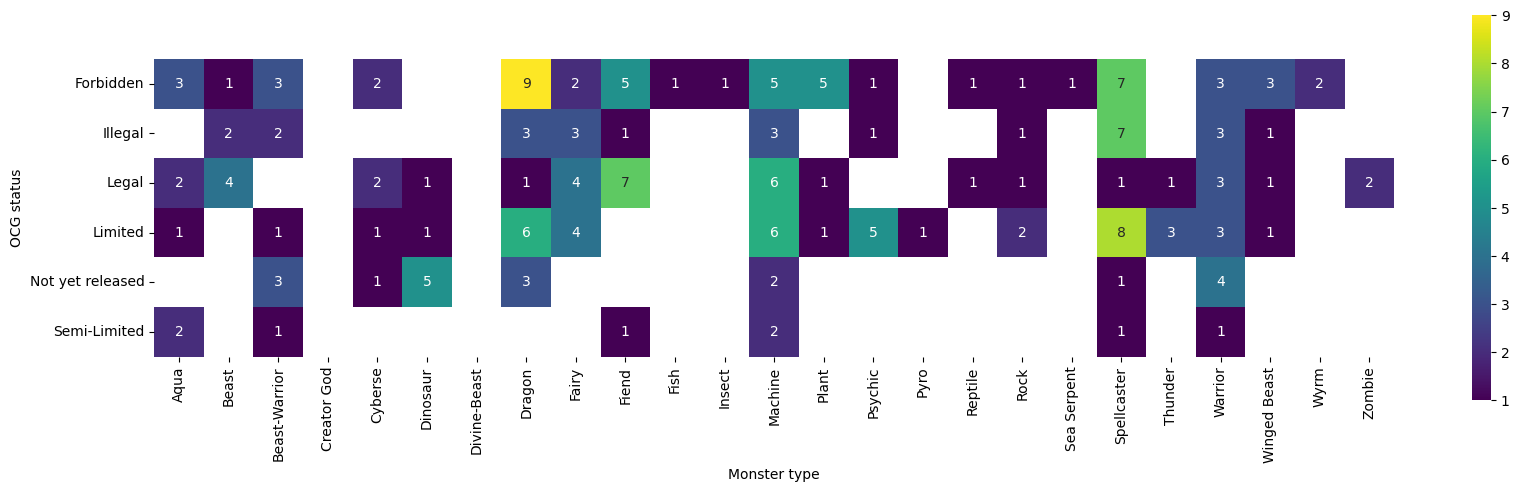

In [108]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [109]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Legal  Limited  \
Archseries                                                      
-Eyes Dragon                       1        0      0        0   
Adventurer Token (series)          1        0      0        0   
Amazoness                          1        0      0        0   
Ancient Gear                       0        0      1        0   
Attribute Knight                   0        0      0        1   
...                              ...      ...    ...      ...   
Zombie counterpart                 0        0      1        0   
Zoodiac                            2        0      0        2   
roid                               0        0      0        1   
tellarknight                       0        0      0        1   
All                               72       29     28       65   

OCG status                 Not yet released  Semi-Limited  All  
Archseries                                                      
-Eyes Dragon                              0             0    1  
Adventurer Token (series)                 0             1    2  
Amazoness                                 0             0    1  
Ancient Gear                              0             0    1  
Attribute Knight                          0             0    1  
...                                     ...           ...  ...  
Zombie counterpart                        0             0    1  
Zoodiac                                   0             0    4  
roid                                      0             0    1  
tellarknight                              0             0    1  
All                                      25            17  236  

[137 rows x 7 columns]

### TCG vs. OCG status

In [110]:
cg_crosstab = pd.crosstab(cards_df['OCG status'],cards_df['TCG status'], dropna=False, margins = False)
cg_crosstab

TCG status        Forbidden  Illegal  Legal  Limited  Not yet released  \
OCG status                                                               
Forbidden                72        0      0        4                 0   
Illegal                   0       23      0        0                 0   
Legal                     0        0     25        0                 0   
Limited                   8        0      0       40                 0   
Not yet released          0        0      0        0                 0   
Semi-Limited              1        0      0        4                 0   
Unlimited                23        0      0       32                28   

TCG status        Semi-Limited  Unlimited  
OCG status                                 
Forbidden                    0         11  
Illegal                      0          0  
Legal                        0          0  
Limited                      0         28  
Not yet released             0          1  
Semi-Limited                 3         15  
Unlimited                    2      11538

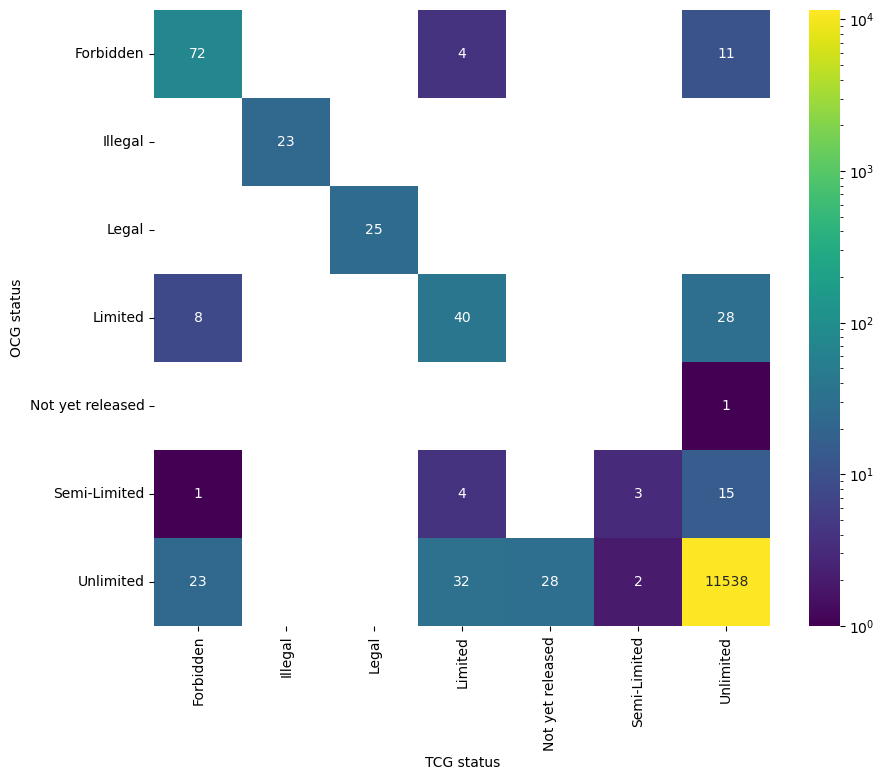

In [111]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Extras

## Multiple secondary types

In [112]:
cards_df.dropna(subset='Secondary type', axis=0)[[len(x)>1 for x in cards_df['Secondary type'].dropna()]]

Name  Password     Card type Property  \
9264                   Scapeghost  67284107  Monster Card      NaN   
9429               Shaddoll Falco  37445295  Monster Card      NaN   
11050            Torque Tune Gear  79538761  Monster Card      NaN   
11259  Turbo-Tainted Hot Rod GT19  16769305  Monster Card      NaN   

                  Archseries  \
9264   (Zombie counterpart,)   
9429             (Shaddoll,)   
11050                    NaN   
11259                    NaN   

                                             Effect type TCG status  \
9264                                      (Flip effect,)  Unlimited   
9429            (Condition, Flip effect, Trigger Effect)  Unlimited   
11050  (Continuous-like Effect, Ignition Effect, Igni...  Unlimited   
11259          (Condition, Quick Effect, Trigger Effect)  Unlimited   

      OCG status                                           Page URL Artwork  \
9264   Unlimited              https://yugipedia.com/wiki/Scapeghost     NaN   
9429   Unlimited          https://yugipedia.com/wiki/Shaddoll_Falco     NaN   
11050  Unlimited        https://yugipedia.com/wiki/Torque_Tune_Gear     NaN   
11259  Unlimited  https://yugipedia.com/wiki/Turbo-Tainted_Hot_R...     NaN   

        Modification date Errata Attribute    Primary type  \
9264  2021-11-01 01:07:12    NaN      DARK  Effect Monster   
9429  2021-05-16 16:34:34    NaN      DARK  Effect Monster   
11050 2022-07-24 09:51:16    NaN     LIGHT  Effect Monster   
11259 2023-01-26 17:36:07    NaN      FIRE  Effect Monster   

                       Secondary type Monster type   DEF Pendulum Scale Link  \
9264    (Flip monster, Tuner monster)       Zombie     0            NaN  NaN   
9429    (Flip monster, Tuner monster)  Spellcaster  1400            NaN  NaN   
11050  (Tuner monster, Union monster)      Machine     0            NaN  NaN   
11259   (Flip monster, Tuner monster)      Machine  1500            NaN  NaN   

      Link Arrows  ATK Level/Rank  
9264          NaN    0          1  
9429          NaN  600          2  
11050         NaN    0          1  
11259         NaN  500          3

## Not yet released

In [113]:
cards_df.loc[cards_df['OCG status'] == 'Not yet released'].loc[full_df['TCG status'] == 'Not yet released']

Empty DataFrame
Columns: [Name, Password, Card type, Property, Archseries, Effect type, TCG status, OCG status, Page URL, Artwork, Modification date, Errata, Attribute, Primary type, Secondary type, Monster type, DEF, Pendulum Scale, Link, Link Arrows, ATK, Level/Rank]
Index: []

## Counters and Tokens

In [114]:
counter_df.dropna(how='all',axis=1)

Name Card type TCG status  \
0                                Albaz the Shrouded   Counter      Legal   
1                               Aluber the Dogmatic   Counter      Legal   
2                             Black Feather Counter   Counter      Legal   
3                                           Counter   Counter        NaN   
4                               Ecclesia the Exiled   Counter      Legal   
5                                     Emperor's Key   Counter        NaN   
6   Jesse Anderson - Bonder with the Crystal Beasts   Counter      Legal   
7            Jesse and Ruby - Unleashing the Legend   Counter      Legal   
8                                  Predator Counter   Counter        NaN   
9                                     Spell Counter   Counter        NaN   
10                                      Tri-Brigade   Counter      Legal   
11                             The Virtuous Vestals   Counter      Legal   
12                                    Wedge Counter   Counter        NaN   

   OCG status                                           Page URL  \
0       Legal      https://yugipedia.com/wiki/Albaz_the_Shrouded   
1       Legal     https://yugipedia.com/wiki/Aluber_the_Dogmatic   
2       Legal  https://yugipedia.com/wiki/Black_Feather_Count...   
3       Legal          https://yugipedia.com/wiki/Counter_(card)   
4       Legal     https://yugipedia.com/wiki/Ecclesia_the_Exiled   
5       Legal  https://yugipedia.com/wiki/Emperor%27s_Key_(card)   
6       Legal  https://yugipedia.com/wiki/Jesse_Anderson_-_Bo...   
7       Legal  https://yugipedia.com/wiki/Jesse_and_Ruby_-_Un...   
8       Legal  https://yugipedia.com/wiki/Predator_Counter_(c...   
9       Legal    https://yugipedia.com/wiki/Spell_Counter_(card)   
10      Legal      https://yugipedia.com/wiki/Tri-Brigade_(card)   
11      Legal    https://yugipedia.com/wiki/The_Virtuous_Vestals   
12      Legal    https://yugipedia.com/wiki/Wedge_Counter_(card)   

     Modification date  
0  2022-04-16 11:51:55  
1  2022-07-04 09:51:18  
2  2023-02-07 09:48:14  
3  2022-05-26 09:47:12  
4  2022-04-16 11:51:54  
5  2023-02-13 00:23:57  
6  2022-12-01 15:20:27  
7  2022-12-01 15:20:15  
8  2023-02-09 14:31:21  
9  2023-01-03 20:39:28  
10 2022-04-16 11:51:53  
11 2023-01-31 14:29:47  
12 2019-12-08 00:39:31

# Epilogue

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [115]:
benchmark('cards',timestamp)

TypeError: argument of type 'float' is not iterable

In [ ]:
footer(timestamp)

## HTML export

In [ ]:
# Save notebook on disck before generating HTML report
save_notebook()

In [ ]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.isoformat() + "'"}